# Report-Predictive Modelling

1. Name:- Avdhoot Suhas Gaikwad
2. Batch:- 23rd April Master of AI batch.
3. Project Name:- Chemical Property Modelling in association with
    asktalos.com and UltraTech Cement Limited and Aditya Birla
    Group



In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

ModuleNotFoundError: No module named 'numpy'

In [ ]:
#importing dataset 
df=pd.read_csv("Material Compressive Strength Experimental Data.csv")

In [ ]:
df.head() 

Material Quantity (gm)  Additive Catalyst (gm)  Ash Component (gm)  \
0                  486.42                  180.60               21.26   
1                  133.32                  260.14              185.60   
2                  559.97                    2.84              111.76   
3                  391.43                  351.05               76.39   
4                  394.78                  352.61              194.35   

   Water Mix (ml)  Plasticizer (gm)  Moderate Aggregator  Refined Aggregator  \
0          201.66             16.11              1151.17              708.50   
1          175.99              6.27              1090.57             1010.25   
2          295.23             11.95              1024.93              810.69   
3          299.14             19.00              1134.88              881.34   
4          235.54             17.02              1098.24              781.01   

   Formulation Duration (hrs)  Compression Strength MPa  
0                      344.43                     79.89  
1                       28.86                     59.80  
2                      237.68                     77.86  
3                      208.81                     71.74  
4                      266.84                     76.07

Observations
1. It shows that there are eight independent variabes ( material quality,additive catalyst, Ash component, Water, Plasticizer, Moderate Aggregator, Refined aggregator, Formaulation Duration, and 
                                                       one dependent variable as Compressive strength) in given dataset
2. All the records are numeric

In [ ]:
# Step 2 renaming the given parameters to the suitable lables 
# Step-Changing the index of dataframe performed here
df=df.rename(columns={'Material Quantity (gm)':"Quality",
                      'Additive Catalyst (gm)':"Catalyst",
                     'Ash Component (gm)':"Ash",
                     'Water Mix (ml)':"Water",
                     'Plasticizer (gm)':"Plasticizer",
                     'Moderate Aggregator':"Mod_Aggregator",
                     'Refined Aggregator':"Ref_Aggregator",
                      'Formulation Duration (hrs)':"Duration",
                     'Compression Strength MPa':"Comp_Strength"})

In [ ]:
#To print the renamed parameters dataset to see the 
#changes applied on parameters
df.head() 

Quality  Catalyst     Ash   Water  Plasticizer  Mod_Aggregator  \
0   486.42    180.60   21.26  201.66        16.11         1151.17   
1   133.32    260.14  185.60  175.99         6.27         1090.57   
2   559.97      2.84  111.76  295.23        11.95         1024.93   
3   391.43    351.05   76.39  299.14        19.00         1134.88   
4   394.78    352.61  194.35  235.54        17.02         1098.24   

   Ref_Aggregator  Duration  Comp_Strength  
0          708.50    344.43          79.89  
1         1010.25     28.86          59.80  
2          810.69    237.68          77.86  
3          881.34    208.81          71.74  
4          781.01    266.84          76.07

In [ ]:
df #to see the entire dataset rows and columns available in given dataset 

Quality  Catalyst     Ash   Water  Plasticizer  Mod_Aggregator  \
0      486.42    180.60   21.26  201.66        16.11         1151.17   
1      133.32    260.14  185.60  175.99         6.27         1090.57   
2      559.97      2.84  111.76  295.23        11.95         1024.93   
3      391.43    351.05   76.39  299.14        19.00         1134.88   
4      394.78    352.61  194.35  235.54        17.02         1098.24   
...       ...       ...     ...     ...          ...             ...   
6134   188.78    162.30  142.65  163.66        15.98         1003.82   
6135   349.87    291.45   77.82  188.26        25.82          925.10   
6136   358.29     22.70   17.99  208.58        34.91         1081.07   
6137   445.25    275.59  178.86  191.77        18.07          865.15   
6138   560.23    266.56  167.14  175.49        10.63         1165.87   

      Ref_Aggregator  Duration  Comp_Strength  
0             708.50    344.43          79.89  
1            1010.25     28.86          59.80  
2             810.69    237.68          77.86  
3             881.34    208.81          71.74  
4             781.01    266.84          76.07  
...              ...       ...            ...  
6134         1002.47    357.91          50.61  
6135         1005.31    104.20          54.24  
6136          792.44    302.76          56.57  
6137          833.10    374.63          58.21  
6138          894.53    360.96          58.96  

[6139 rows x 9 columns]

In [ ]:
#to check for the datatypes of all the parameters given in dataset
df.dtypes  

Quality           float64
Catalyst          float64
Ash               float64
Water             float64
Plasticizer       float64
Mod_Aggregator    float64
Ref_Aggregator    float64
Duration          float64
Comp_Strength     float64
dtype: object

In [ ]:
df.shape #to check the numbers of rows and columns available in dataset

(6139, 9)

Observations :
1. The provided dataset is containing 6139 rows and 9 columns 
2. All the datatypes provoded are numeric and of float64 as printed above

In [ ]:
#Checking for the null values in the datasets
df.isnull().sum()

Quality           109
Catalyst          109
Ash               109
Water             109
Plasticizer       109
Mod_Aggregator    109
Ref_Aggregator    109
Duration          109
Comp_Strength       0
dtype: int64

Observations
1. from the above null value checking we got to kow that the given dataset contains
   109 rows of null values present which is almost of around 1% of the 6139 total rows
2. So as the instructions provided we can drop those rows to remove the null values from the dataset 

In [ ]:
#Null value handelling by dropping the null value component from dataset
df = df.dropna() 

In [ ]:
#Here I skipped the null value components and reprinted the dataset with updated needed columns and rows.
df #printed the updated dataset in daframe with removed null values

Quality  Catalyst     Ash   Water  Plasticizer  Mod_Aggregator  \
0      486.42    180.60   21.26  201.66        16.11         1151.17   
1      133.32    260.14  185.60  175.99         6.27         1090.57   
2      559.97      2.84  111.76  295.23        11.95         1024.93   
3      391.43    351.05   76.39  299.14        19.00         1134.88   
4      394.78    352.61  194.35  235.54        17.02         1098.24   
...       ...       ...     ...     ...          ...             ...   
6134   188.78    162.30  142.65  163.66        15.98         1003.82   
6135   349.87    291.45   77.82  188.26        25.82          925.10   
6136   358.29     22.70   17.99  208.58        34.91         1081.07   
6137   445.25    275.59  178.86  191.77        18.07          865.15   
6138   560.23    266.56  167.14  175.49        10.63         1165.87   

      Ref_Aggregator  Duration  Comp_Strength  
0             708.50    344.43          79.89  
1            1010.25     28.86          59.80  
2             810.69    237.68          77.86  
3             881.34    208.81          71.74  
4             781.01    266.84          76.07  
...              ...       ...            ...  
6134         1002.47    357.91          50.61  
6135         1005.31    104.20          54.24  
6136          792.44    302.76          56.57  
6137          833.10    374.63          58.21  
6138          894.53    360.96          58.96  

[6030 rows x 9 columns]

In [ ]:
df.isnull() #checking for null values removal taken place or not

Quality  Catalyst    Ash  Water  Plasticizer  Mod_Aggregator  \
0       False     False  False  False        False           False   
1       False     False  False  False        False           False   
2       False     False  False  False        False           False   
3       False     False  False  False        False           False   
4       False     False  False  False        False           False   
...       ...       ...    ...    ...          ...             ...   
6134    False     False  False  False        False           False   
6135    False     False  False  False        False           False   
6136    False     False  False  False        False           False   
6137    False     False  False  False        False           False   
6138    False     False  False  False        False           False   

      Ref_Aggregator  Duration  Comp_Strength  
0              False     False          False  
1              False     False          False  
2              False     False          False  
3              False     False          False  
4              False     False          False  
...              ...       ...            ...  
6134           False     False          False  
6135           False     False          False  
6136           False     False          False  
6137           False     False          False  
6138           False     False          False  

[6030 rows x 9 columns]

In [ ]:
df.isnull().sum()  #null values removed from the given dataset and printed the details here

Quality           0
Catalyst          0
Ash               0
Water             0
Plasticizer       0
Mod_Aggregator    0
Ref_Aggregator    0
Duration          0
Comp_Strength     0
dtype: int64

In [ ]:
df.describe() 

Quality     Catalyst          Ash        Water  Plasticizer  \
count  6030.000000  6030.000000  6030.000000  6030.000000  6030.000000   
mean    383.642297   196.699846   111.856252   224.296955    17.651085   
std     149.994316   133.329220    74.241117    41.545751    11.687965   
min     124.440000     0.000000     0.000000   148.600000     0.000000   
25%     256.030000    78.210000    44.582500   190.387500     7.922500   
50%     377.405000   192.320000   115.250000   225.700000    16.345000   
75%     511.522500   307.650000   174.257500   257.447500    27.667500   
max     658.800000   438.470000   244.120000   301.340000    39.280000   

       Mod_Aggregator  Ref_Aggregator     Duration  Comp_Strength  
count     6030.000000     6030.000000  6030.000000    6030.000000  
mean       998.669332      811.832398   174.408504      56.782683  
std         97.732677      112.813539   112.415173      16.170643  
min        821.540000      609.230000    16.250000       2.610000  
25%        918.437500      717.447500    70.300000      46.962500  
50%        997.985000      810.260000   163.105000      59.705000  
75%       1079.827500      905.857500   272.602500      69.807500  
max       1174.360000     1018.050000   380.250000      92.510000

In [ ]:
df.describe().T  #Transforming the data to find the appropriate details

count        mean         std     min       25%      50%  \
Quality         6030.0  383.642297  149.994316  124.44  256.0300  377.405   
Catalyst        6030.0  196.699846  133.329220    0.00   78.2100  192.320   
Ash             6030.0  111.856252   74.241117    0.00   44.5825  115.250   
Water           6030.0  224.296955   41.545751  148.60  190.3875  225.700   
Plasticizer     6030.0   17.651085   11.687965    0.00    7.9225   16.345   
Mod_Aggregator  6030.0  998.669332   97.732677  821.54  918.4375  997.985   
Ref_Aggregator  6030.0  811.832398  112.813539  609.23  717.4475  810.260   
Duration        6030.0  174.408504  112.415173   16.25   70.3000  163.105   
Comp_Strength   6030.0   56.782683   16.170643    2.61   46.9625   59.705   

                      75%      max  
Quality          511.5225   658.80  
Catalyst         307.6500   438.47  
Ash              174.2575   244.12  
Water            257.4475   301.34  
Plasticizer       27.6675    39.28  
Mod_Aggregator  1079.8275  1174.36  
Ref_Aggregator   905.8575  1018.05  
Duration         272.6025   380.25  
Comp_Strength     69.8075    92.51

In [ ]:
#Changing the datatypes.

df = df.astype({'Quality': int, 'Catalyst': int, 'Ash':int, 'Water':int, 'Plasticizer':int,
                'Mod_Aggregator':int,'Ref_Aggregator':int,'Duration':int, 'Comp_Strength':int})

In [ ]:
#printing the changed datatyped datadrame
df 

Quality  Catalyst  Ash  Water  Plasticizer  Mod_Aggregator  \
0         486       180   21    201           16            1151   
1         133       260  185    175            6            1090   
2         559         2  111    295           11            1024   
3         391       351   76    299           19            1134   
4         394       352  194    235           17            1098   
...       ...       ...  ...    ...          ...             ...   
6134      188       162  142    163           15            1003   
6135      349       291   77    188           25             925   
6136      358        22   17    208           34            1081   
6137      445       275  178    191           18             865   
6138      560       266  167    175           10            1165   

      Ref_Aggregator  Duration  Comp_Strength  
0                708       344             79  
1               1010        28             59  
2                810       237             77  
3                881       208             71  
4                781       266             76  
...              ...       ...            ...  
6134            1002       357             50  
6135            1005       104             54  
6136             792       302             56  
6137             833       374             58  
6138             894       360             58  

[6030 rows x 9 columns]

In this stage performed all the necessary data cleaning and preprocessing techniques and given the observation after main points as per the given QnA list of 11 Questions and tried to achieve the required analysis on given dataset 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [ ]:
pip install pyforest

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pyforest import*
lazy_imports()

['import keras',
 'from sklearn.linear_model import Ridge',
 'import glob',
 'from sklearn.impute import SimpleImputer',
 'import plotly as py',
 'import fbprophet',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.model_selection import RandomizedSearchCV',
 'import xgboost as xgb',
 'import nltk',
 'from sklearn.linear_model import ElasticNetCV',
 'from sklearn.decomposition import PCA',
 'import dash',
 'import cv2',
 'import pickle',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import plotly.express as px',
 'from sklearn.preprocessing import StandardScaler',
 'from sklearn.model_selection import GridSearchCV',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from dask import dataframe as dd',
 'from sklearn.model_selection import StratifiedKFold',
 'import tqdm',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from scipy import signal as sg',
 'import altair as alt',
 'from sklearn.linear_model import Lasso',
 'from sklearn.model

In [ ]:
df = pd.read_csv('Material Compressive Strength Experimental Data.csv')

<IPython.core.display.Javascript object>

In [ ]:
df.head()

Material Quantity (gm)  Additive Catalyst (gm)  Ash Component (gm)  \
0                  486.42                  180.60               21.26   
1                  133.32                  260.14              185.60   
2                  559.97                    2.84              111.76   
3                  391.43                  351.05               76.39   
4                  394.78                  352.61              194.35   

   Water Mix (ml)  Plasticizer (gm)  Moderate Aggregator  Refined Aggregator  \
0          201.66             16.11              1151.17              708.50   
1          175.99              6.27              1090.57             1010.25   
2          295.23             11.95              1024.93              810.69   
3          299.14             19.00              1134.88              881.34   
4          235.54             17.02              1098.24              781.01   

   Formulation Duration (hrs)  Compression Strength MPa  
0                      344.43                     79.89  
1                       28.86                     59.80  
2                      237.68                     77.86  
3                      208.81                     71.74  
4                      266.84                     76.07

Observations

It shows that there are eight independent variabes ( material quantity,additive catalyst, Ash component, Water, Plasticizer, Moderate Aggregator, Refined aggregator, Formaulation Duration, and one dependent variable as Compressive strength) in given dataset
All the records are numeric

In [ ]:
# Step 2 renaming the given parameters to the suitable lables 
# Step-Changing the index of dataframe performed here
df=df.rename(columns={'Material Quantity (gm)':"Mat_Quantity",
                      'Additive Catalyst (gm)':"Catalyst",
                     'Ash Component (gm)':"Ash",
                     'Water Mix (ml)':"Water",
                     'Plasticizer (gm)':"Plasticizer",
                     'Moderate Aggregator':"Mod_Aggregator",
                     'Refined Aggregator':"Ref_Aggregator",
                      'Formulation Duration (hrs)':"Duration",
                     'Compression Strength MPa':"Comp_Strength"})

In [ ]:
df.columns = ['Mat_Quantity', 'Catalyst', 'Ash', 'Water','Plasticizer','Mod_Aggregator','Ref_Aggregator','Duration','Comp_Strength']

In [ ]:
df.head()

Mat_Quantity  Catalyst     Ash   Water  Plasticizer  Mod_Aggregator  \
0        486.42    180.60   21.26  201.66        16.11         1151.17   
1        133.32    260.14  185.60  175.99         6.27         1090.57   
2        559.97      2.84  111.76  295.23        11.95         1024.93   
3        391.43    351.05   76.39  299.14        19.00         1134.88   
4        394.78    352.61  194.35  235.54        17.02         1098.24   

   Ref_Aggregator  Duration  Comp_Strength  
0          708.50    344.43          79.89  
1         1010.25     28.86          59.80  
2          810.69    237.68          77.86  
3          881.34    208.81          71.74  
4          781.01    266.84          76.07

In [ ]:
df.dtypes

Mat_Quantity      float64
Catalyst          float64
Ash               float64
Water             float64
Plasticizer       float64
Mod_Aggregator    float64
Ref_Aggregator    float64
Duration          float64
Comp_Strength     float64
dtype: object

In [ ]:
df.shape

(6139, 9)

In [ ]:
#Checking for missing values

df.isnull().sum()

Mat_Quantity      109
Catalyst          109
Ash               109
Water             109
Plasticizer       109
Mod_Aggregator    109
Ref_Aggregator    109
Duration          109
Comp_Strength       0
dtype: int64

In [ ]:
df.describe().T

count        mean         std     min       25%      50%  \
Mat_Quantity    6030.0  383.642297  149.994316  124.44  256.0300  377.405   
Catalyst        6030.0  196.699846  133.329220    0.00   78.2100  192.320   
Ash             6030.0  111.856252   74.241117    0.00   44.5825  115.250   
Water           6030.0  224.296955   41.545751  148.60  190.3875  225.700   
Plasticizer     6030.0   17.651085   11.687965    0.00    7.9225   16.345   
Mod_Aggregator  6030.0  998.669332   97.732677  821.54  918.4375  997.985   
Ref_Aggregator  6030.0  811.832398  112.813539  609.23  717.4475  810.260   
Duration        6030.0  174.408504  112.415173   16.25   70.3000  163.105   
Comp_Strength   6139.0   56.851430   16.124932    2.61   47.0850   59.790   

                      75%      max  
Mat_Quantity     511.5225   658.80  
Catalyst         307.6500   438.47  
Ash              174.2575   244.12  
Water            257.4475   301.34  
Plasticizer       27.6675    39.28  
Mod_Aggregator  1079.8275  1174.36  
Ref_Aggregator   905.8575  1018.05  
Duration         272.6025   380.25  
Comp_Strength     69.8450    92.51

# **Exploratory Data Analysis**

In [ ]:
#Quartiles
from scipy import stats

Q1=df['Mat_Quantity'].quantile(q=0.25)
Q3=df['Mat_Quantity'].quantile(q=0.75)

print('1st Quartile (Q1) is: ',Q1)
print('3rd Quartile (Q3) is: ',Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['Mat_Quantity']))

1st Quartile (Q1) is:  256.03
3rd Quartile (Q3) is:  511.5225
Interquartile range (IQR) is  nan


In [ ]:
#Outlier detection from Interquartile range (IQR) in original data


L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outlier limit in Material_Quantity: ',L_outliers)
print('Upper outlier limit in Material_Quantity: ',U_outliers)

Lower outlier limit in Material_Quantity:  -127.20875000000001
Upper outlier limit in Material_Quantity:  894.76125


In [ ]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in Material_Quantity upper: ', df[df['Mat_Quantity']>586.4375]['Mat_Quantity'].count())
print('Number of outliers in Material_Quantity lower: ', df[df['Mat_Quantity']<-44.0625]['Mat_Quantity'].count())

#print('% of Outlier in Material_Quantity upper: ', round(df[df['Mat_Quantity']>586.4375]['Mat_Quantity'].count()*100/len(df)))
#print('% of Outlier in Material_Quantity lower: ', round(df[df['Mat_Quantity']<-44.0625]['Mat_Quantity'].count()*100/len(df)))

Number of outliers in Material_Quantity upper:  709
Number of outliers in Material_Quantity lower:  0


<IPython.core.display.Javascript object>

<Axes: xlabel='Mat_Quantity'>

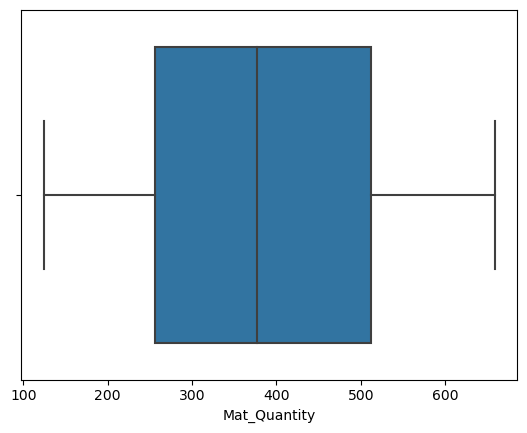

In [ ]:
#Distribution of Mat-Quantity

sns.boxplot(x='Mat_Quantity',data=df, orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\avd4t\AppData\Local\Temp\ipykernel_4916\591815636.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ash']).set_title('Ash')


<IPython.core.display.Javascript object>

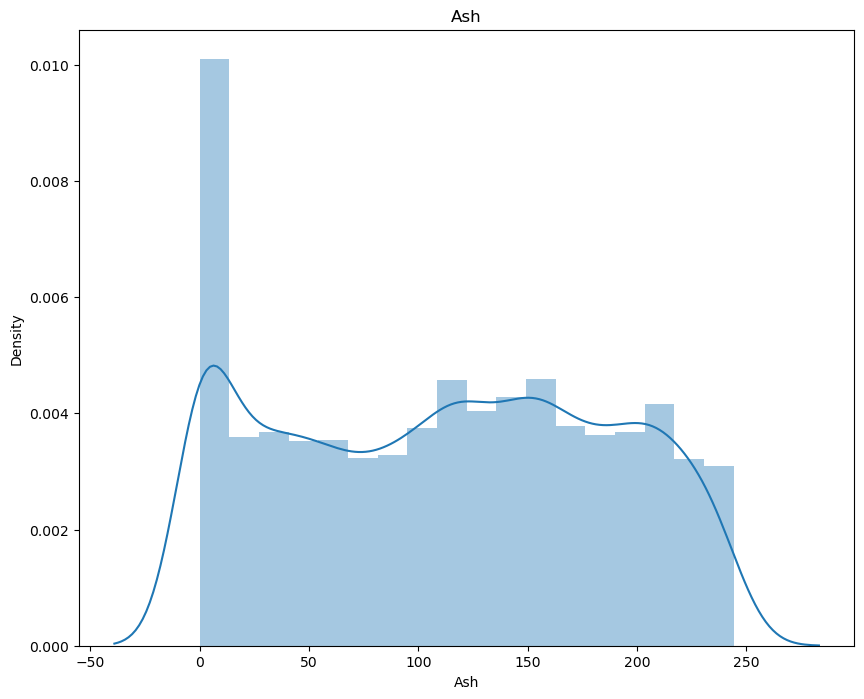

In [ ]:
#displot

plt.figure(figsize=(10,8))
sns.distplot(df['Ash']).set_title('Ash')
plt.show()

# **Water**

In [ ]:
#Quartiles

w_Q1=df['Water'].quantile(q=0.25)
w_Q3=df['Water'].quantile(q=0.75)

print('1st Quartile (Q1) is: ', w_Q1)
print('3rd Quartile (Q3) is: ', w_Q3)
print('Interquartile range (IQR) is: ', stats.iqr(df['Water']))

1st Quartile (Q1) is:  190.3875
3rd Quartile (Q3) is:  257.4475
Interquartile range (IQR) is:  nan


In [ ]:
#Outlier detection from Interquartile range (IQR) in original data

WL_outliers=w_Q1-1.5*(w_Q3-w_Q1)
WU_outliers=w_Q3+1.5*(w_Q3-w_Q1)

print('Lower outlier in water: ',WL_outliers)
print('Upper outlier in water: ',WU_outliers)

Lower outlier in water:  89.79749999999999
Upper outlier in water:  358.0375


In [ ]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in water upper: ', df[df['Water']>232.64999999999998]['Water'].count())
print('Number of outliers in water lower: ', df[df['Water']<124.25000000000001]['Water'].count())

# print('% of Outlier in water upper: ', round(df[df['Water']>232.64999999999998]['Water'].count()*100/len(df)))
# print('% of Outlier in water lower: ', round(df[df['Water']<124.25000000000001]['Water'].count()*100/len(df)))

Number of outliers in water upper:  2643
Number of outliers in water lower:  0


<IPython.core.display.Javascript object>

<Axes: xlabel='Water'>

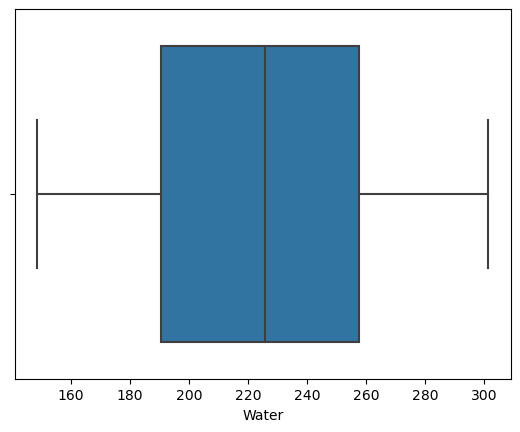

In [ ]:
#Distribution of WATER

sns.boxplot(x='Water', data=df, orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\avd4t\AppData\Local\Temp\ipykernel_4916\3909587349.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Water']).set_title('Water')


<IPython.core.display.Javascript object>

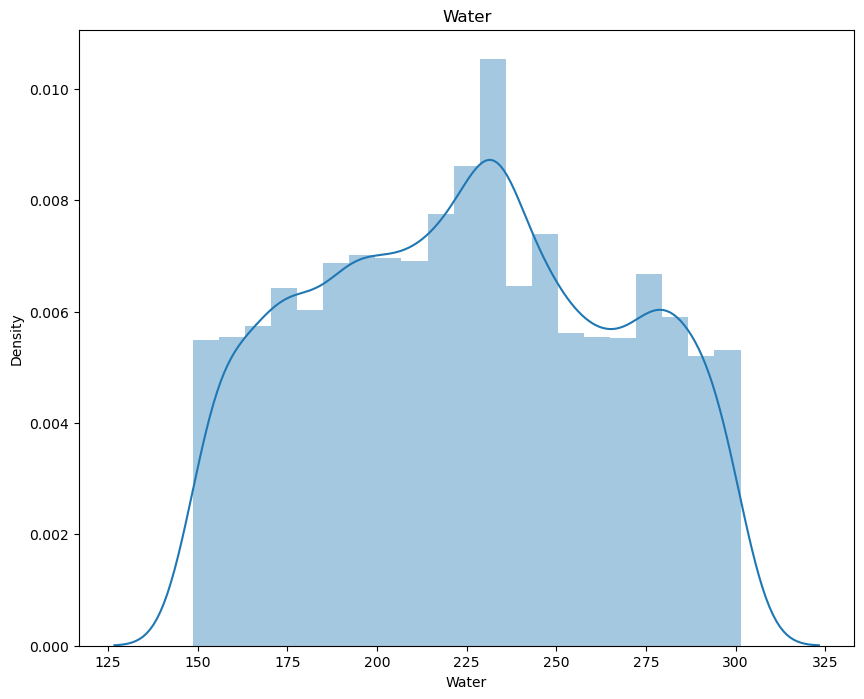

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df['Water']).set_title('Water')
plt.show()

In [ ]:
Q1=df['Catalyst'].quantile(q=0.25)
Q3=df['Catalyst'].quantile(q=0.75)

In [ ]:
#Outlier detection from Interquartile range (IQR) in original data

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier in water: ',L_outliers)
print('Upper outlier in water: ',U_outliers)

Lower outlier in water:  -265.9500000000001
Upper outlier in water:  651.8100000000002


In [ ]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in Catalyst upper: ', df[df['Catalyst']>357.375]['Catalyst'].count())
print('Number of outliers in Catalyst lower: ', df[df['Catalyst']<-214.425]['Catalyst'].count())

# print('% of Outlier in Catalyst upper: ', round(df[df['Catalyst']>357.375]['Catalyst'].count()*100/len(df)))
# print('% of Outlier in Catalyst lower: ', round(df[df['Catalyst']<-214.425]['Catalyst'].count()*100/len(df)))

Number of outliers in Catalyst upper:  959
Number of outliers in Catalyst lower:  0


<IPython.core.display.Javascript object>

<Axes: xlabel='Catalyst'>

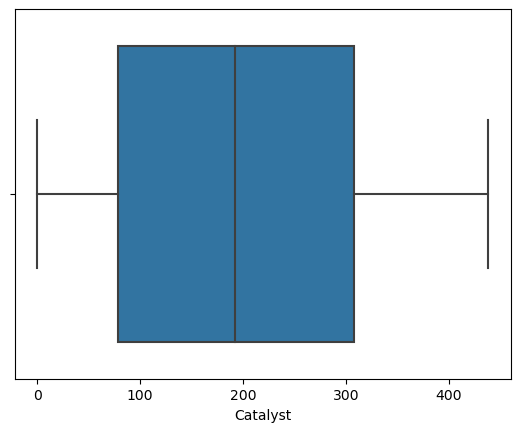

In [ ]:
#Distribution of Catalyst

sns.boxplot(x='Catalyst', data=df, orient='h')

In [ ]:
Q1=df['Duration'].quantile(q=0.25)
Q3=df['Duration'].quantile(q=0.75)

In [ ]:
#Outlier detection from Interquartile range (IQR) in original data

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier in Duration: ',L_outliers)
print('Upper outlier in Duration: ',U_outliers)

Lower outlier in Duration:  -233.1537499999999
Upper outlier in Duration:  576.0562499999999


In [ ]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in Duration upper: ', df[df['Duration']>129.5]['Duration'].count())
print('Number of outliers in Duration lower: ', df[df['Duration']<-66.5]['Duration'].count())

Number of outliers in Duration upper:  3488
Number of outliers in Duration lower:  0


<IPython.core.display.Javascript object>

<Axes: xlabel='Duration'>

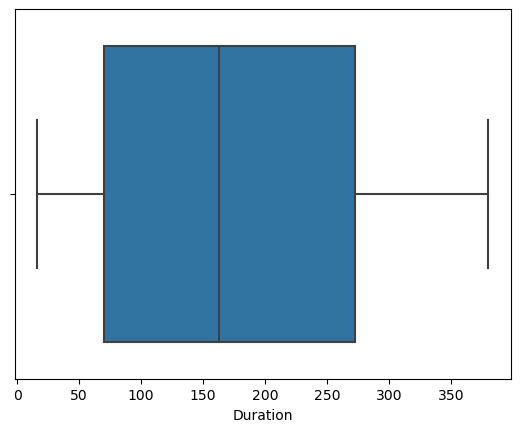

In [ ]:
#Distribution of Duration

sns.boxplot(x='Duration', data=df, orient='h')

# **ASH**

In [ ]:
Q1=df['Ash'].quantile(q=0.25)
Q3=df['Ash'].quantile(q=0.75)

In [ ]:
#Outlier detection from Interquartile range (IQR) in original data

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier in ash: ',L_outliers)
print('Upper outlier in ash: ',U_outliers)

Lower outlier in ash:  -149.93
Upper outlier in ash:  368.77


In [ ]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in ash upper: ', df[df['Ash']>295.75]['Ash'].count())
print('Number of outliers in ash lower: ', df[df['Ash']<-177.45]['Ash'].count())

Number of outliers in ash upper:  0
Number of outliers in ash lower:  0


<IPython.core.display.Javascript object>

<Axes: xlabel='Ash'>

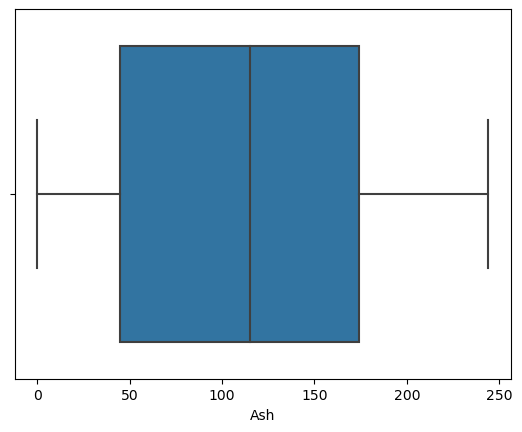

In [ ]:
#Distribution of Ash

sns.boxplot(x='Ash', data=df, orient='h')

# **MultiVaariate Analysis**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\avd4t\AppData\Local\Temp\ipykernel_4916\3469405232.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Mat_Quantity'],ax=ax2[0][0])


<IPython.core.display.Javascript object>

C:\Users\avd4t\AppData\Local\Temp\ipykernel_4916\3469405232.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Catalyst'],ax=ax2[0][1])


<IPython.core.display.Javascript object>

C:\Users\avd4t\AppData\Local\Temp\ipykernel_4916\3469405232.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ash'],ax=ax2[0][2])


<IPython.core.display.Javascript object>

C:\Users\avd4t\AppData\Local\Temp\ipykernel_4916\3469405232.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Water'],ax=ax2[1][0])


<IPython.core.display.Javascript object>

C:\Users\avd4t\AppData\Local\Temp\ipykernel_4916\3469405232.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Plasticizer'],ax=ax2[1][1])


<IPython.core.display.Javascript object>

C:\Users\avd4t\AppData\Local\Temp\ipykernel_4916\3469405232.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Mod_Aggregator'],ax=ax2[1][2])


<IPython.core.display.Javascript object>

C:\Users\avd4t\AppData\Local\Temp\ipykernel_4916\3469405232.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ref_Aggregator'],ax=ax2[2][0])


<IPython.core.display.Javascript object>

C:\Users\avd4t\AppData\Local\Temp\ipykernel_4916\3469405232.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Duration'],ax=ax2[2][1])


<IPython.core.display.Javascript object>

C:\Users\avd4t\AppData\Local\Temp\ipykernel_4916\3469405232.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Comp_Strength'],ax=ax2[2][2])


<Axes: xlabel='Comp_Strength', ylabel='Density'>

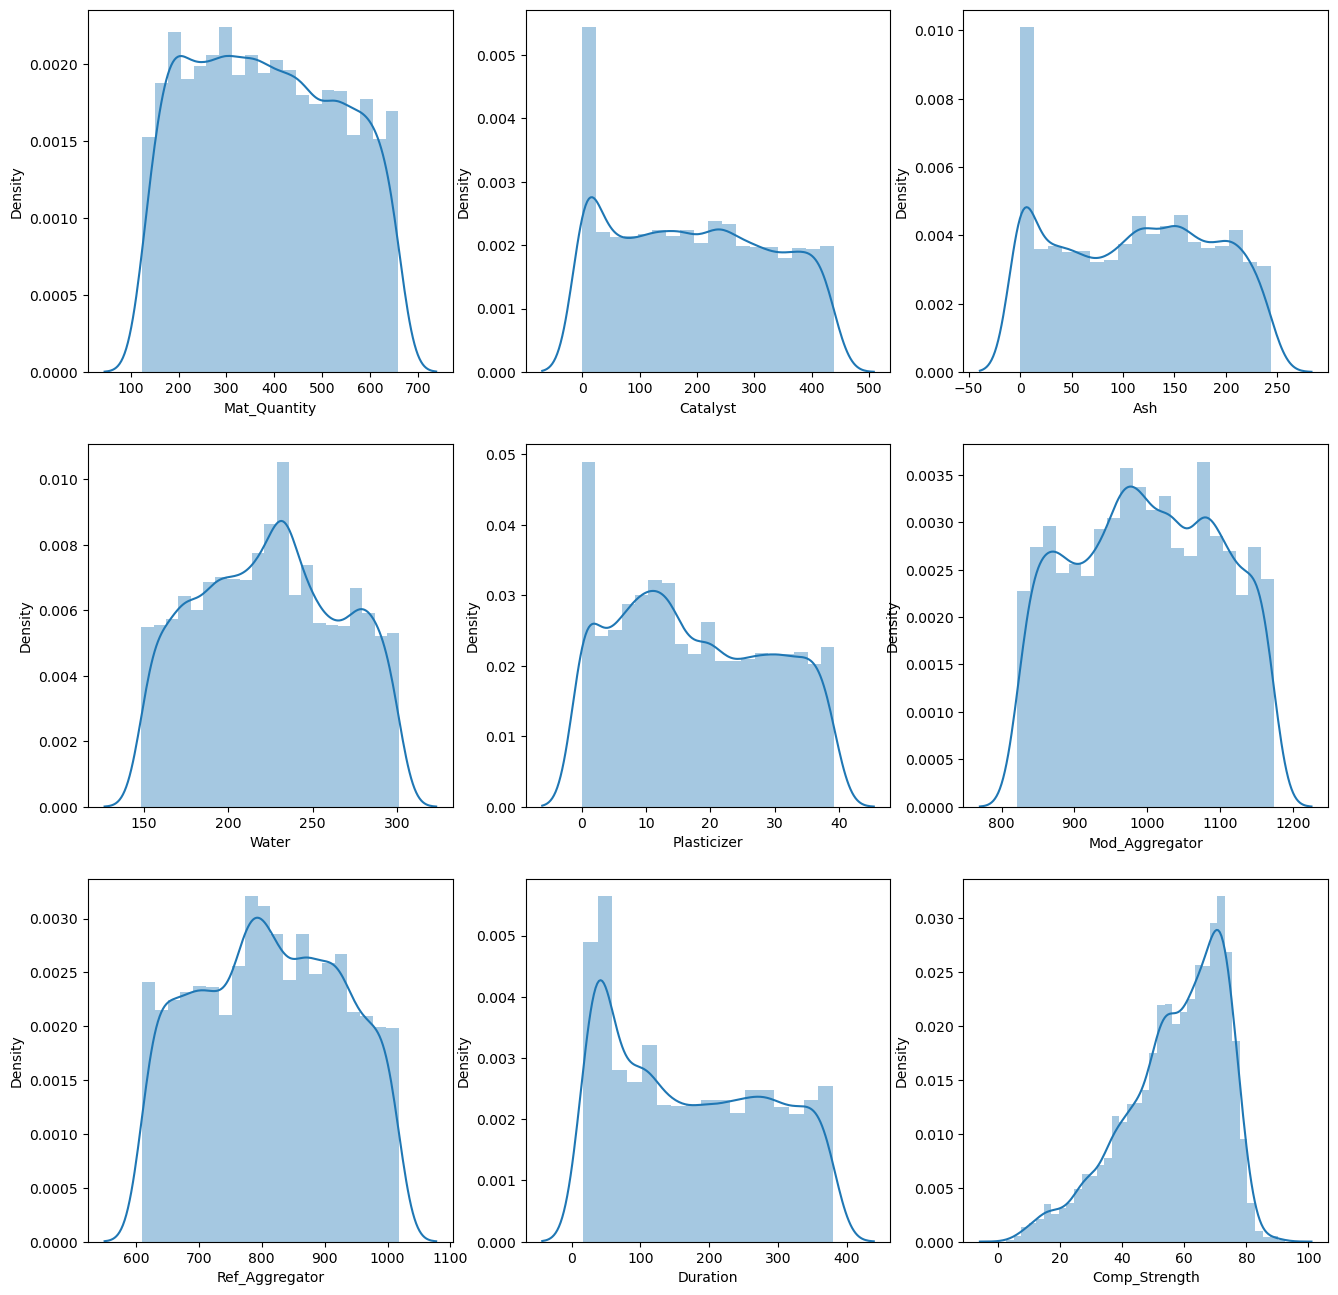

In [ ]:
#Displot

fig,ax2 = plt.subplots(3,3,figsize=(16,16))
sns.distplot(df['Mat_Quantity'],ax=ax2[0][0])
sns.distplot(df['Catalyst'],ax=ax2[0][1])
sns.distplot(df['Ash'],ax=ax2[0][2])
sns.distplot(df['Water'],ax=ax2[1][0])
sns.distplot(df['Plasticizer'],ax=ax2[1][1])
sns.distplot(df['Mod_Aggregator'],ax=ax2[1][2])
sns.distplot(df['Ref_Aggregator'],ax=ax2[2][0])
sns.distplot(df['Duration'],ax=ax2[2][1])
sns.distplot(df['Comp_Strength'],ax=ax2[2][2])

# **Pairplot**

<IPython.core.display.Javascript object>

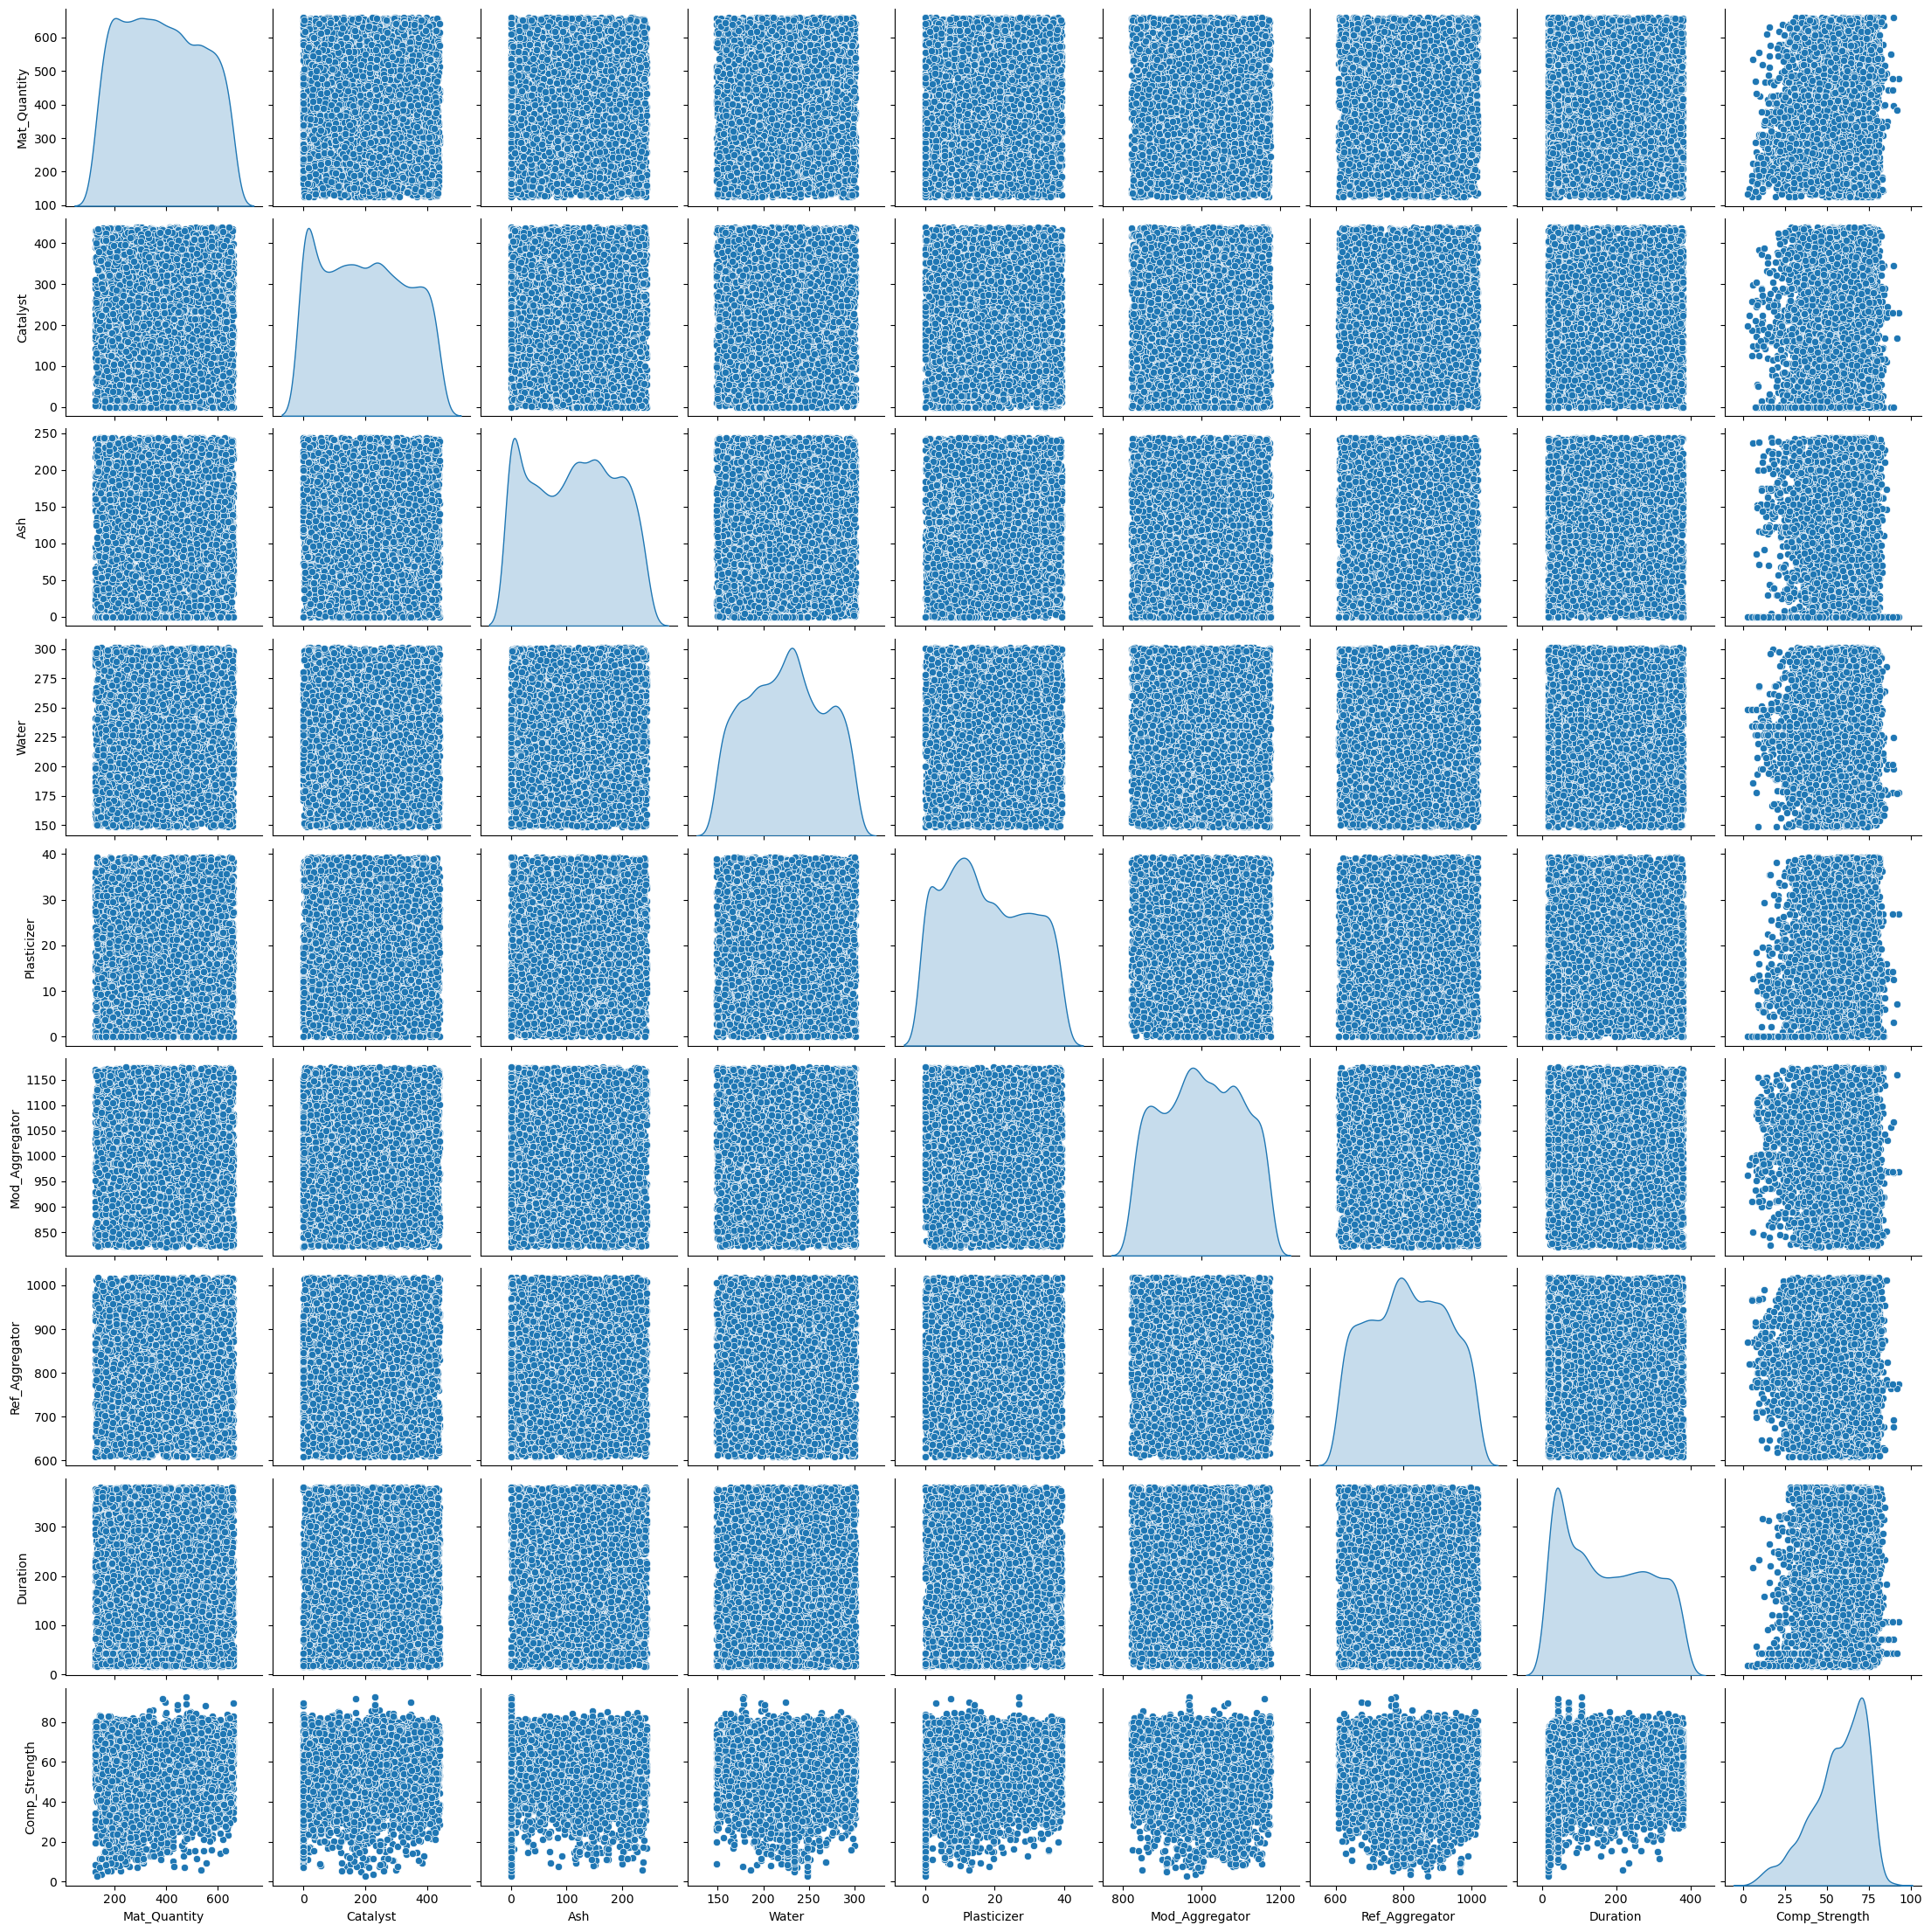

In [ ]:
# pairplot.
#plot density curve instead of histogram in the diagonals

sns.pairplot(df, diag_kind='kde')

# **Scatter Plot**

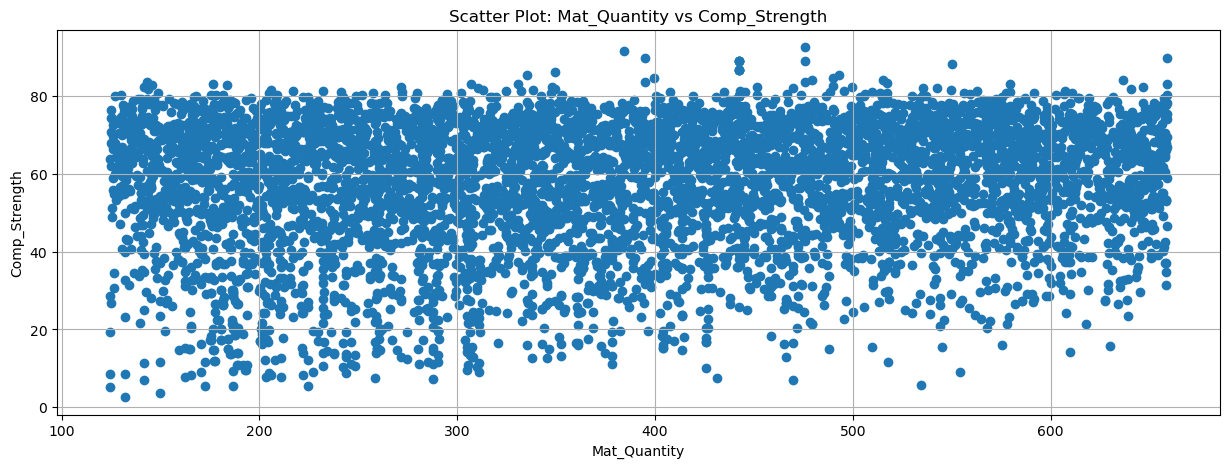

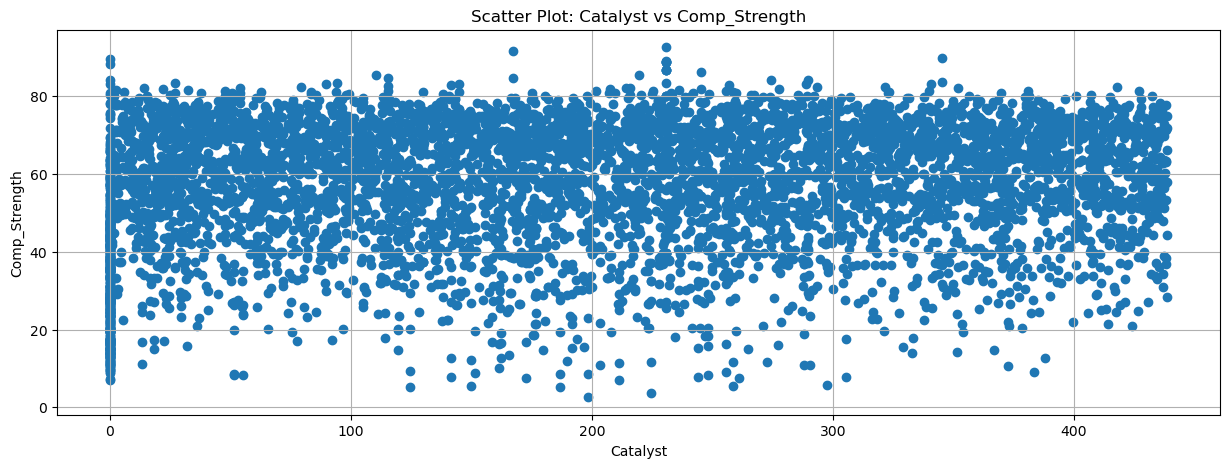

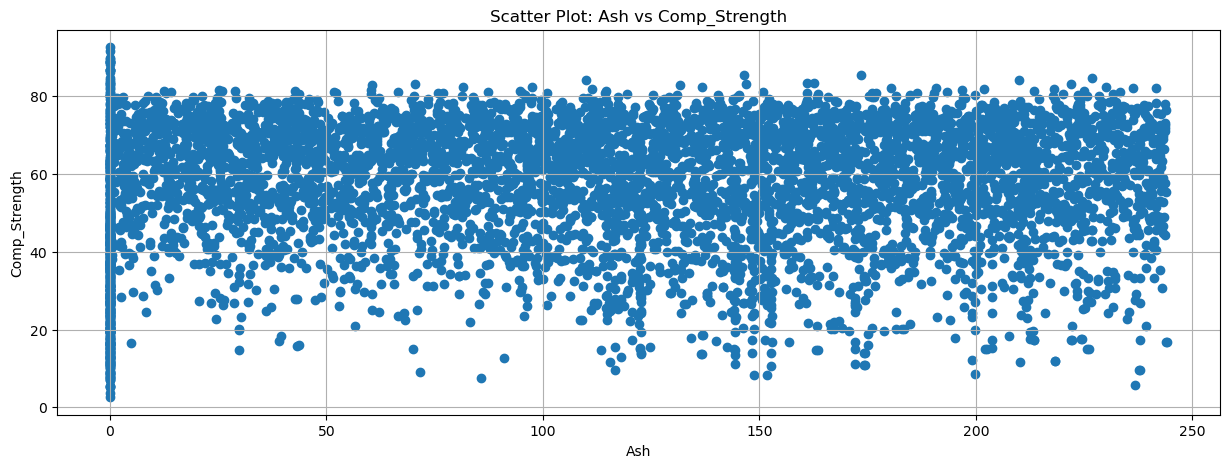

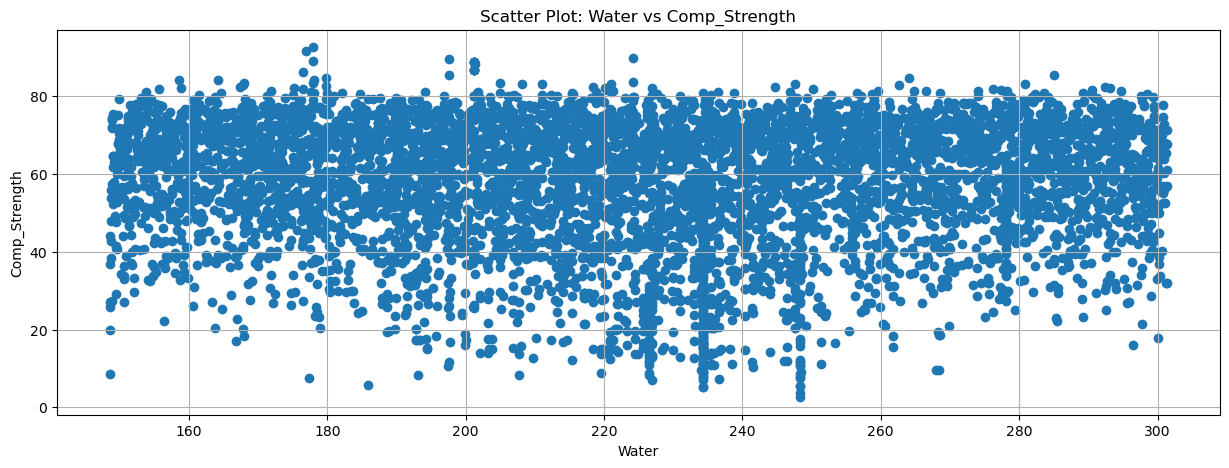

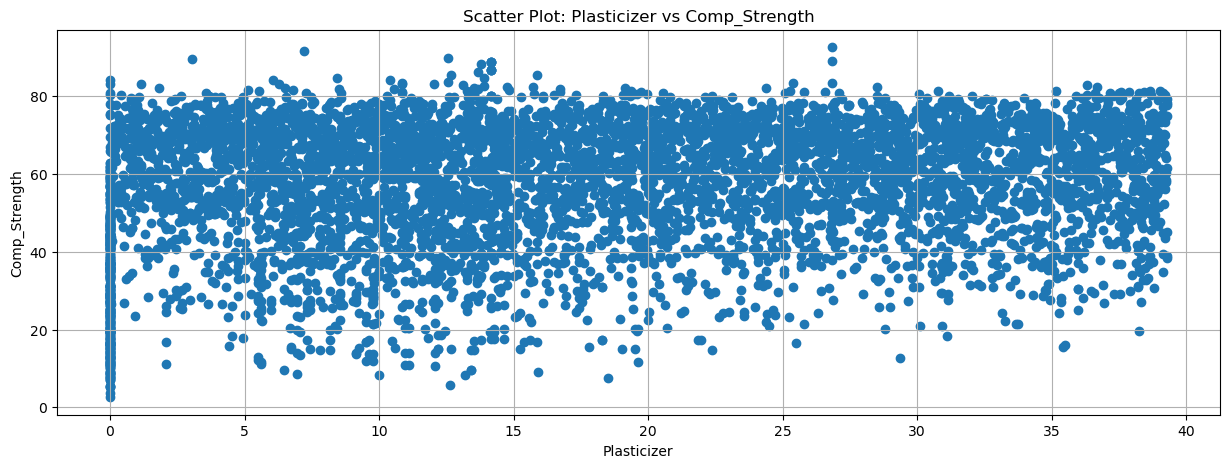

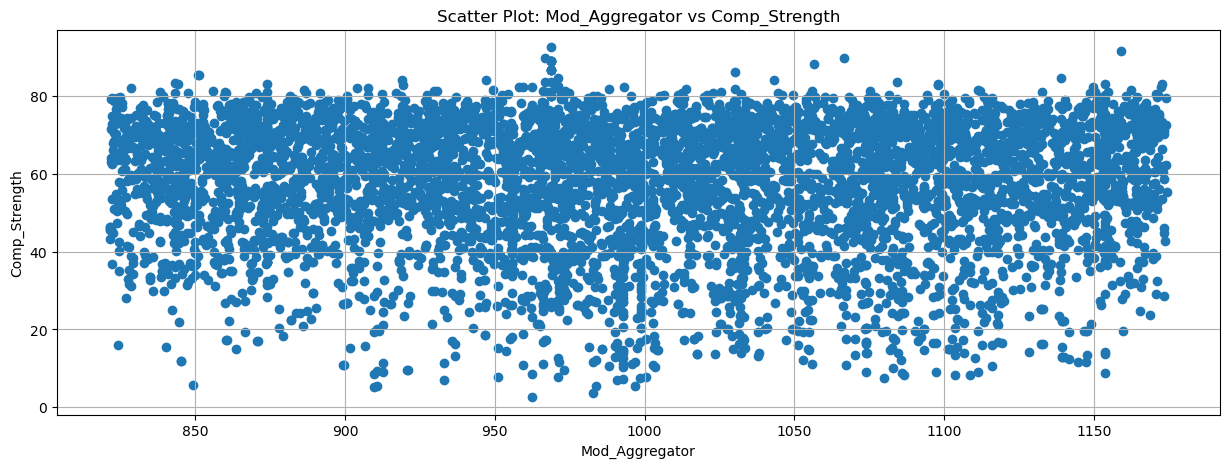

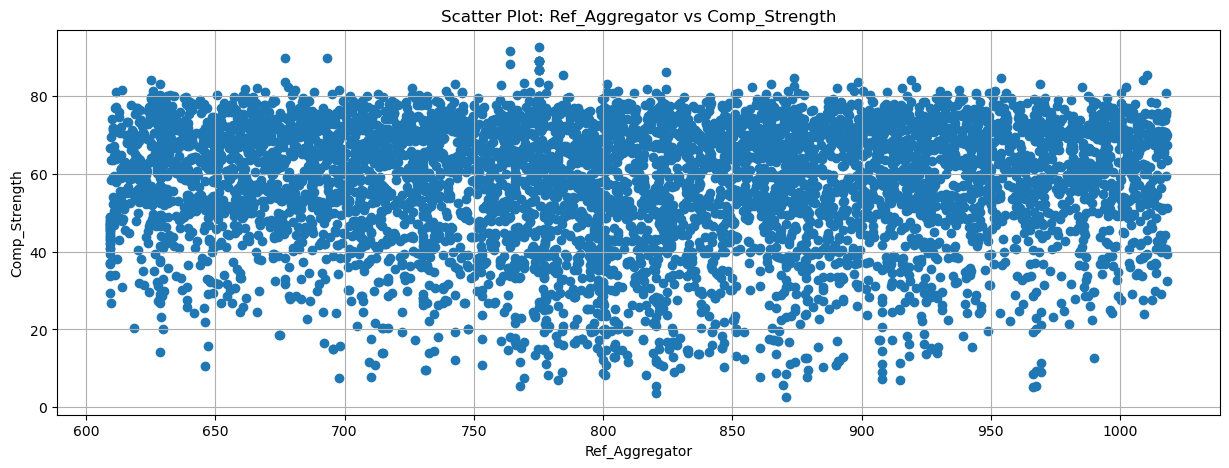

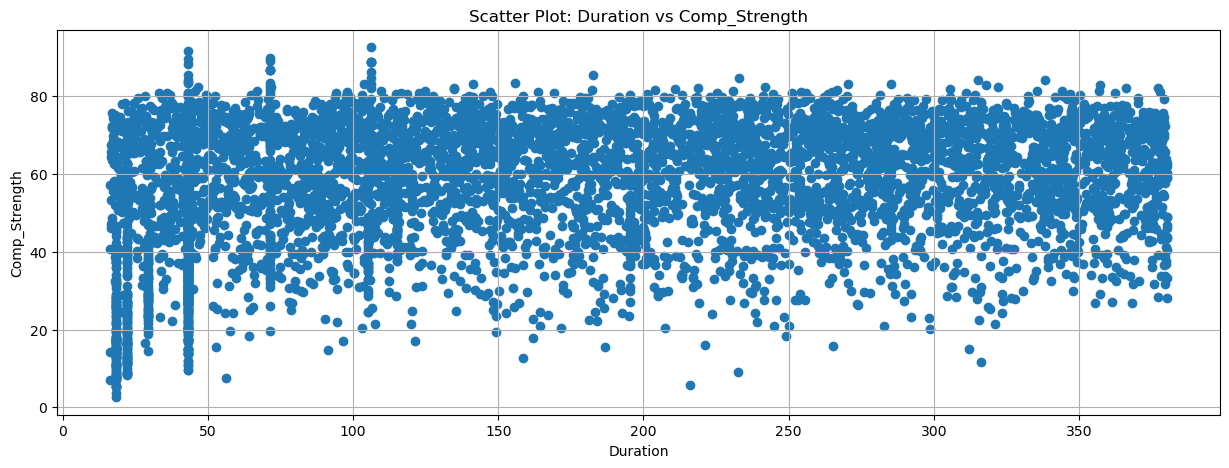

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df contains your DataFrame with 9 columns

# Selecting 8 columns for scatter plots
columns_for_scatter = ['Mat_Quantity', 'Catalyst', 'Ash', 'Water','Plasticizer','Mod_Aggregator','Ref_Aggregator','Duration']

# Column to be plotted against (change 'Column9' to your 9th column name)
column_against = 'Comp_Strength'

# Loop through each pair of columns for scatter plots
for col in columns_for_scatter:
    plt.figure(figsize=(15, 5))
    plt.scatter(df[col], df[column_against])
    plt.title(f'Scatter Plot: {col} vs {column_against}')
    plt.xlabel(col)
    plt.ylabel(column_against)
    plt.grid(True)
    plt.show()

<IPython.core.display.Javascript object>

C:\Users\avd4t\AppData\Local\Temp\ipykernel_4916\2676926190.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Plasticizer'], shade=True)


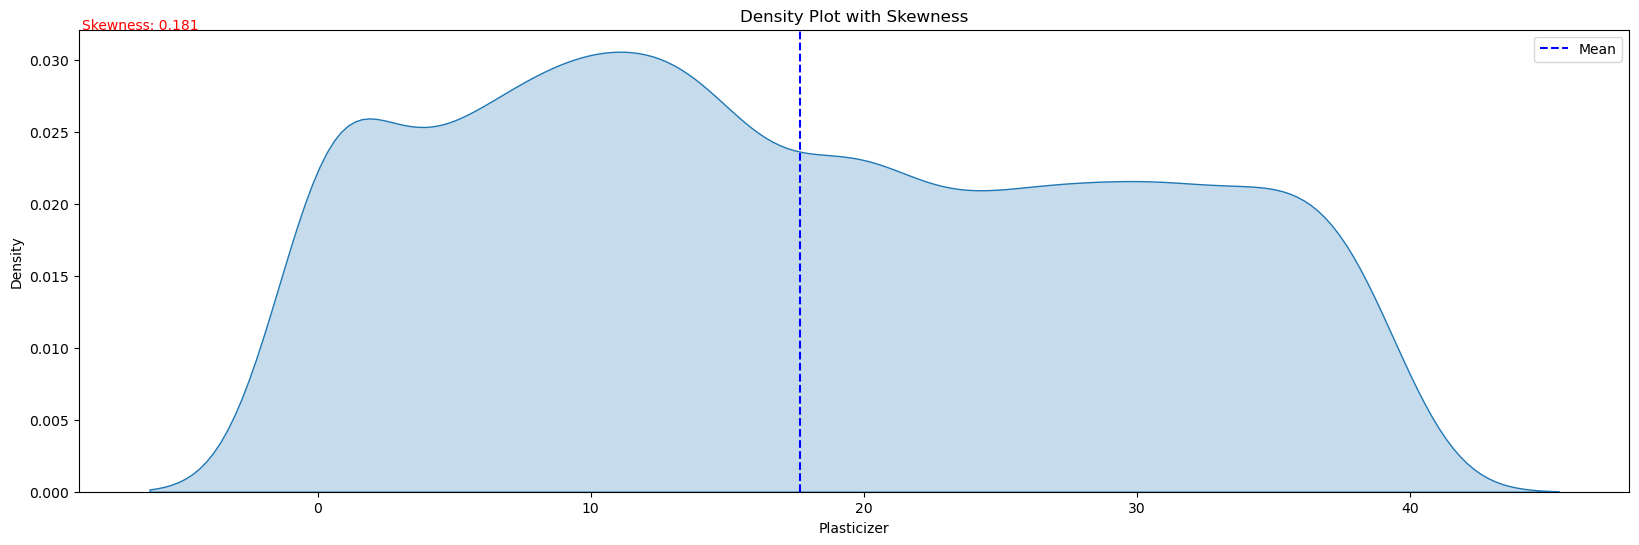

In [ ]:
skewness_value = df['Plasticizer'].skew()

# Create a density plot to visualize the distribution
plt.figure(figsize=(20, 6))
sns.kdeplot(df['Plasticizer'], shade=True)
plt.title('Density Plot with Skewness')
plt.xlabel('Plasticizer')
plt.ylabel('Density')

# Mark skewness value on the plot
plt.text(plt.xlim()[0] + 0.1, plt.ylim()[1] - 0.00000005, f'Skewness: {skewness_value:.3f}', fontsize=10, color='red')
plt.axvline(x=df['Plasticizer'].mean(), color='blue', linestyle='--', label='Mean')

plt.legend()
plt.show()

<IPython.core.display.Javascript object>

C:\Users\avd4t\AppData\Local\Temp\ipykernel_4916\1300214951.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Catalyst'], shade=True)


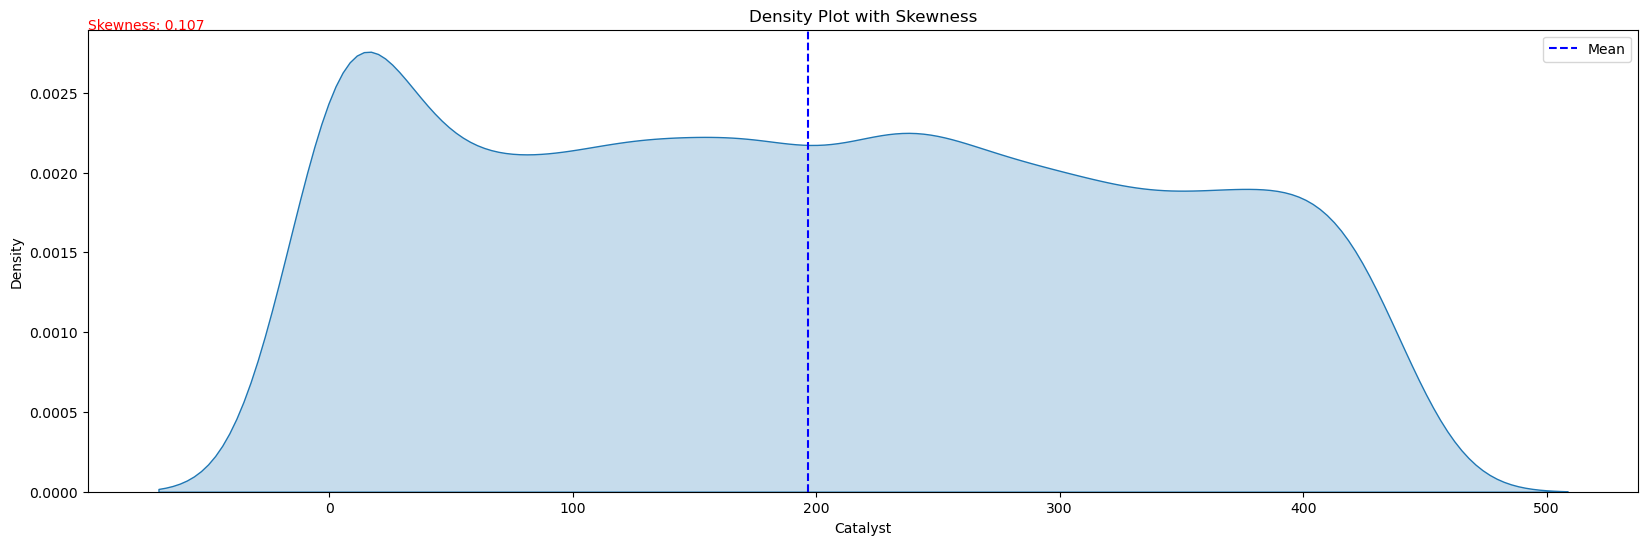

In [ ]:
skewness_value = df['Catalyst'].skew()

# Create a density plot to visualize the distribution
plt.figure(figsize=(20, 6))
sns.kdeplot(df['Catalyst'], shade=True)
plt.title('Density Plot with Skewness')
plt.xlabel('Catalyst')
plt.ylabel('Density')

# Mark skewness value on the plot
plt.text(plt.xlim()[0] + 0.1, plt.ylim()[1] - 0.00000005, f'Skewness: {skewness_value:.3f}', fontsize=10, color='red')
plt.axvline(x=df['Catalyst'].mean(), color='blue', linestyle='--', label='Mean')

plt.legend()
plt.show()

<IPython.core.display.Javascript object>

C:\Users\avd4t\AppData\Local\Temp\ipykernel_4916\415901607.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Ash'], shade=True)


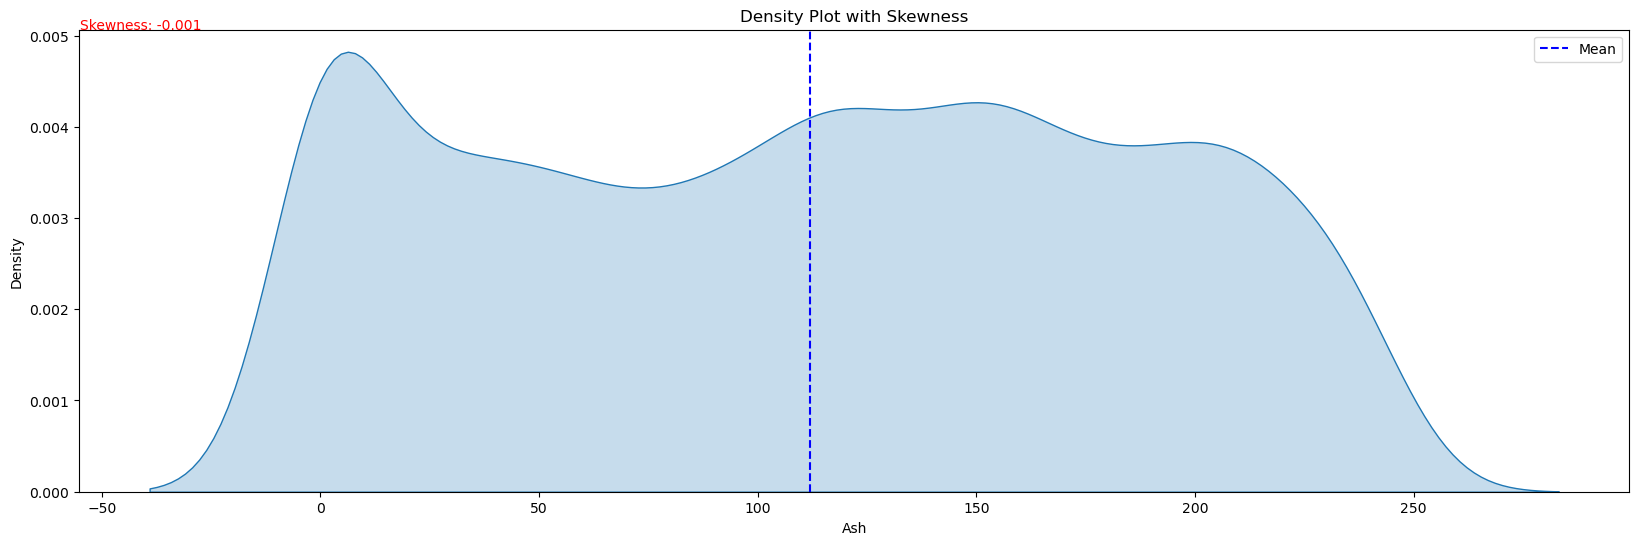

In [ ]:
skewness_value = df['Ash'].skew()

# Create a density plot to visualize the distribution
plt.figure(figsize=(20, 6))
sns.kdeplot(df['Ash'], shade=True)
plt.title('Density Plot with Skewness')
plt.xlabel('Ash')
plt.ylabel('Density')

# Mark skewness value on the plot
plt.text(plt.xlim()[0] + 0.1, plt.ylim()[1] - 0.00000005, f'Skewness: {skewness_value:.3f}', fontsize=10, color='red')
plt.axvline(x=df['Ash'].mean(), color='blue', linestyle='--', label='Mean')

plt.legend()
plt.show()

<IPython.core.display.Javascript object>

C:\Users\avd4t\AppData\Local\Temp\ipykernel_4916\2323929267.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Water'], shade=True)


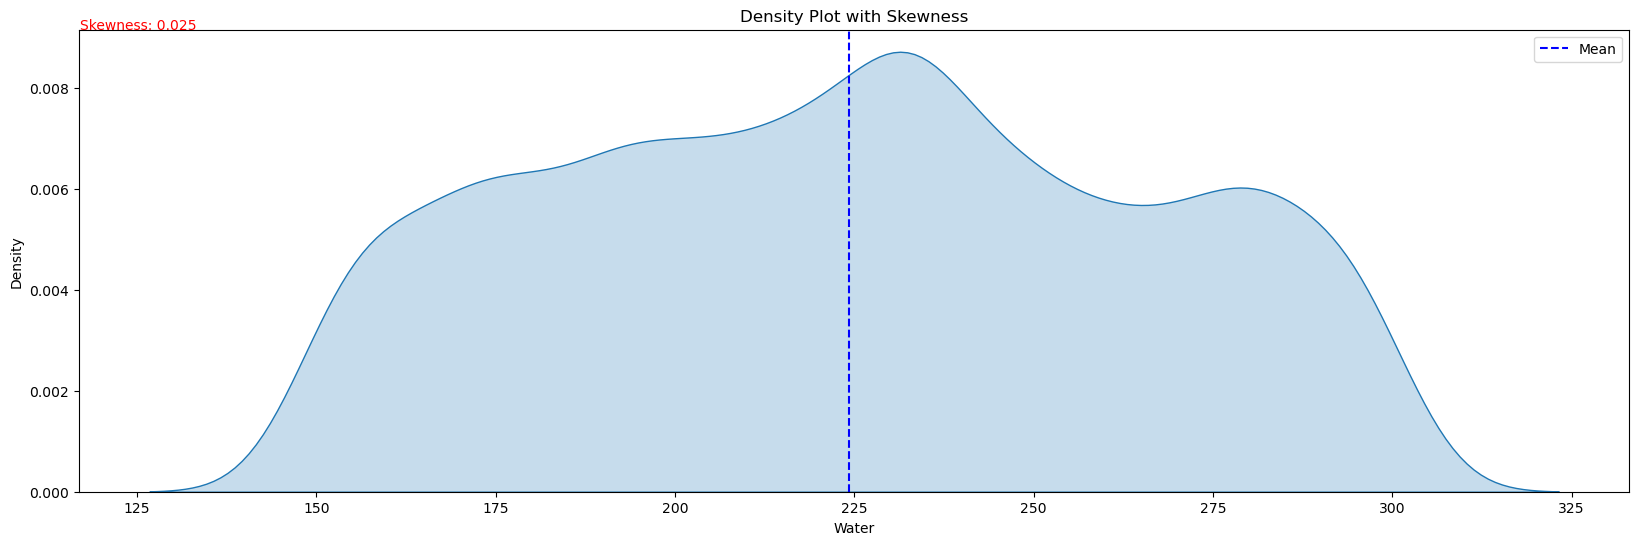

In [ ]:
skewness_value = df['Water'].skew()

# Create a density plot to visualize the distribution
plt.figure(figsize=(20, 6))
sns.kdeplot(df['Water'], shade=True)
plt.title('Density Plot with Skewness')
plt.xlabel('Water')
plt.ylabel('Density')

# Mark skewness value on the plot
plt.text(plt.xlim()[0] + 0.1, plt.ylim()[1] - 0.00000005, f'Skewness: {skewness_value:.3f}', fontsize=10, color='red')
plt.axvline(x=df['Water'].mean(), color='blue', linestyle='--', label='Mean')

plt.legend()
plt.show()

<IPython.core.display.Javascript object>

C:\Users\avd4t\AppData\Local\Temp\ipykernel_4916\2703917968.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Mat_Quantity'], shade=True)


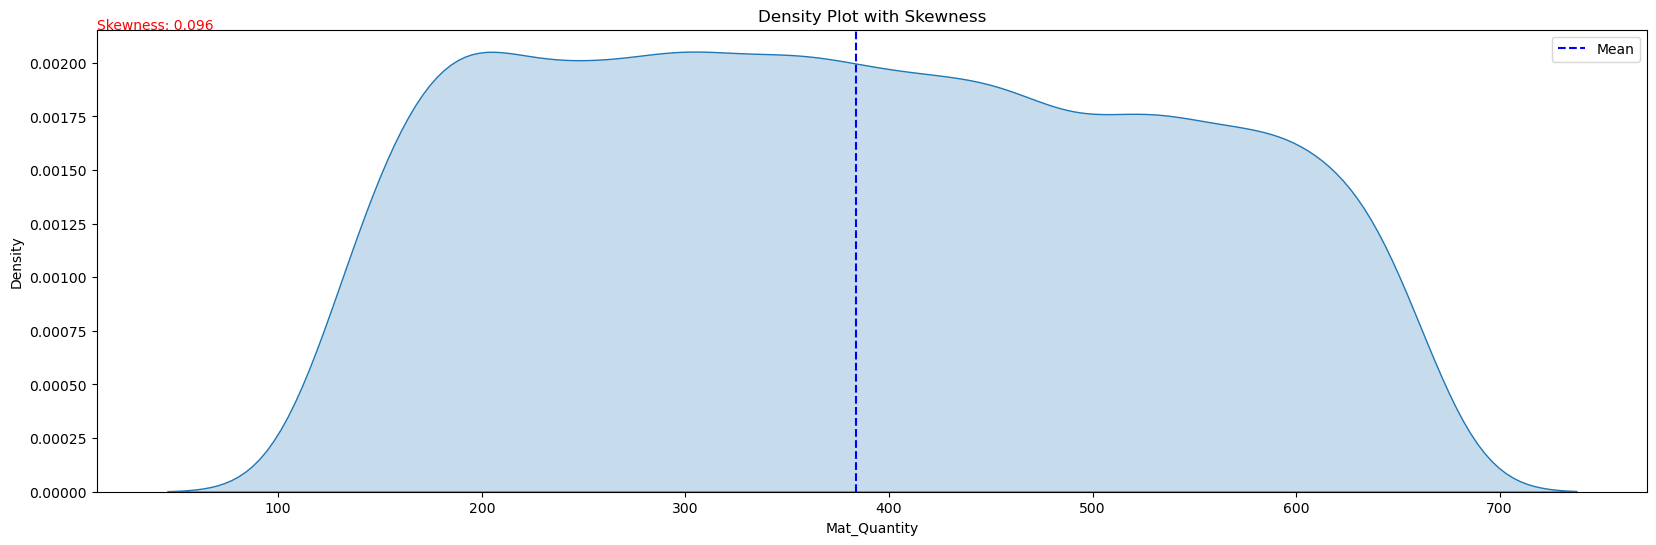

In [ ]:
skewness_value = df['Mat_Quantity'].skew()

# Create a density plot to visualize the distribution
plt.figure(figsize=(20, 6))
sns.kdeplot(df['Mat_Quantity'], shade=True)
plt.title('Density Plot with Skewness')
plt.xlabel('Mat_Quantity')
plt.ylabel('Density')

# Mark skewness value on the plot
plt.text(plt.xlim()[0] + 0.1, plt.ylim()[1] - 0.00000005, f'Skewness: {skewness_value:.3f}', fontsize=10, color='red')
plt.axvline(x=df['Mat_Quantity'].mean(), color='blue', linestyle='--', label='Mean')

plt.legend()
plt.show()

<IPython.core.display.Javascript object>

C:\Users\avd4t\AppData\Local\Temp\ipykernel_4916\3603167535.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Mod_Aggregator'], shade=True)


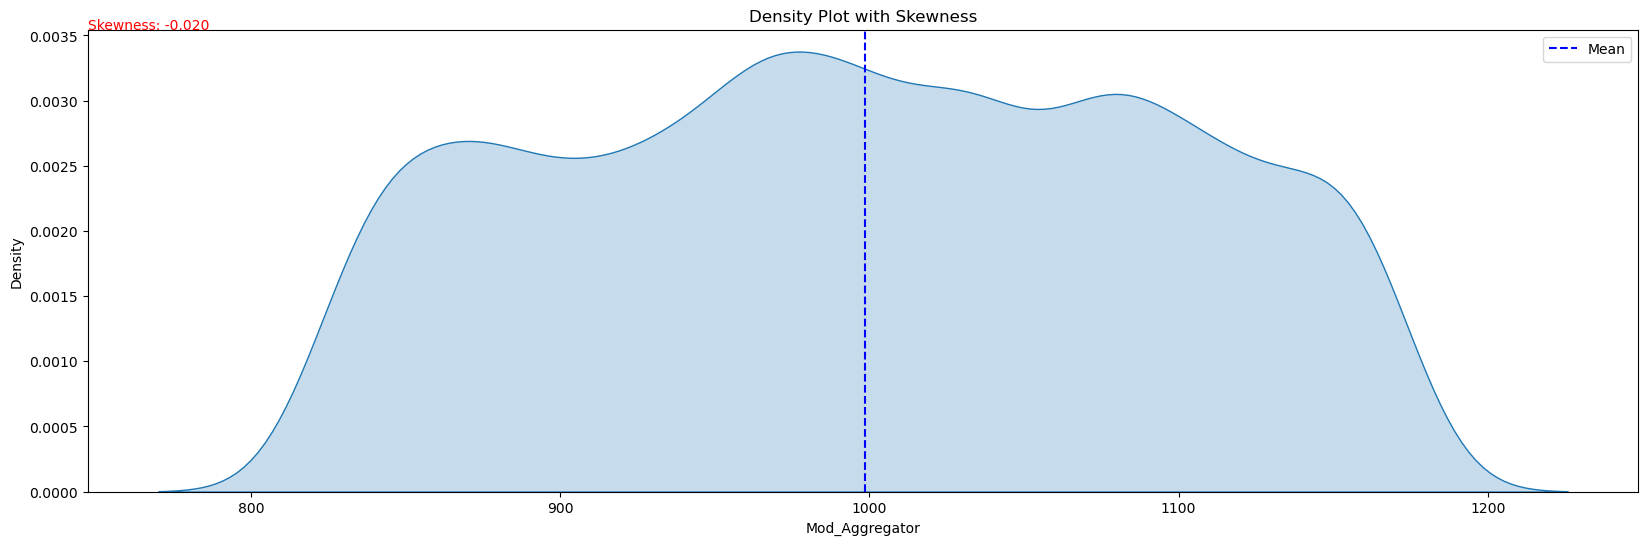

In [ ]:
skewness_value = df['Mod_Aggregator'].skew()

# Create a density plot to visualize the distribution
plt.figure(figsize=(20, 6))
sns.kdeplot(df['Mod_Aggregator'], shade=True)
plt.title('Density Plot with Skewness')
plt.xlabel('Mod_Aggregator')
plt.ylabel('Density')

# Mark skewness value on the plot
plt.text(plt.xlim()[0] + 0.1, plt.ylim()[1] - 0.00000005, f'Skewness: {skewness_value:.3f}', fontsize=10, color='red')
plt.axvline(x=df['Mod_Aggregator'].mean(), color='blue', linestyle='--', label='Mean')

plt.legend()
plt.show()

<IPython.core.display.Javascript object>

C:\Users\avd4t\AppData\Local\Temp\ipykernel_4916\380872242.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Ref_Aggregator'], shade=True)


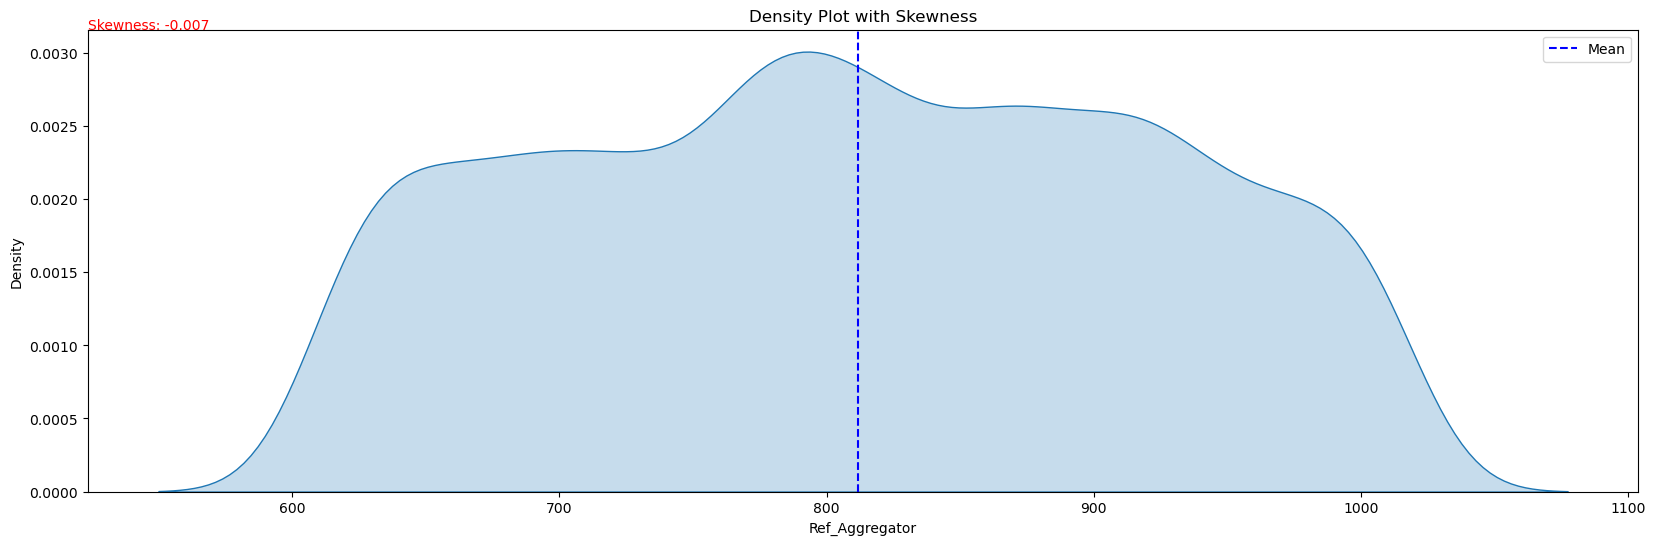

In [ ]:
skewness_value = df['Ref_Aggregator'].skew()

# Create a density plot to visualize the distribution
plt.figure(figsize=(20, 6))
sns.kdeplot(df['Ref_Aggregator'], shade=True)
plt.title('Density Plot with Skewness')
plt.xlabel('Ref_Aggregator')
plt.ylabel('Density')

# Mark skewness value on the plot
plt.text(plt.xlim()[0] + 0.1, plt.ylim()[1] - 0.00000005, f'Skewness: {skewness_value:.3f}', fontsize=10, color='red')
plt.axvline(x=df['Ref_Aggregator'].mean(), color='blue', linestyle='--', label='Mean')

plt.legend()
plt.show()

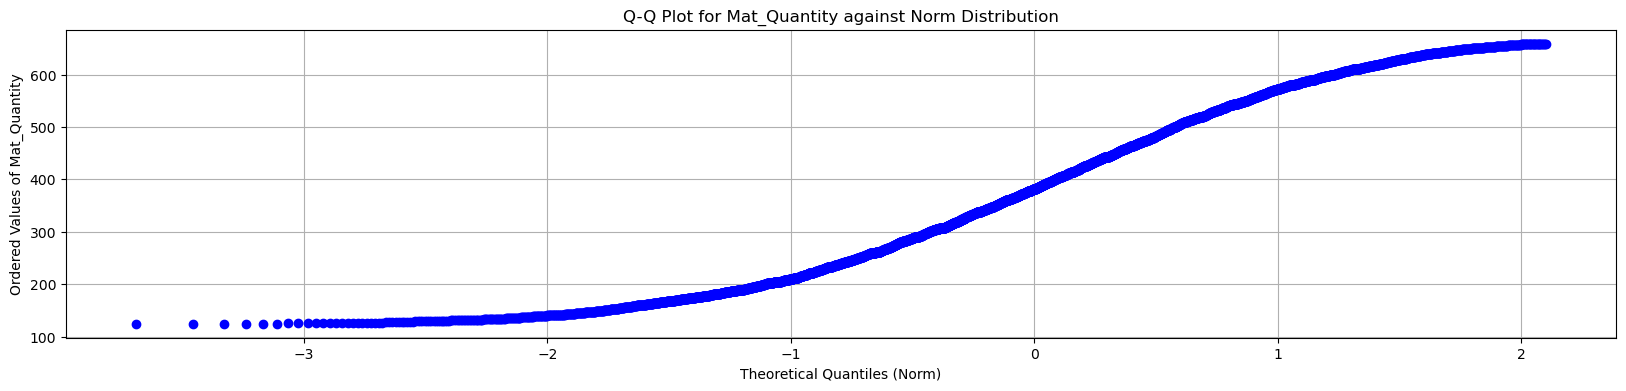

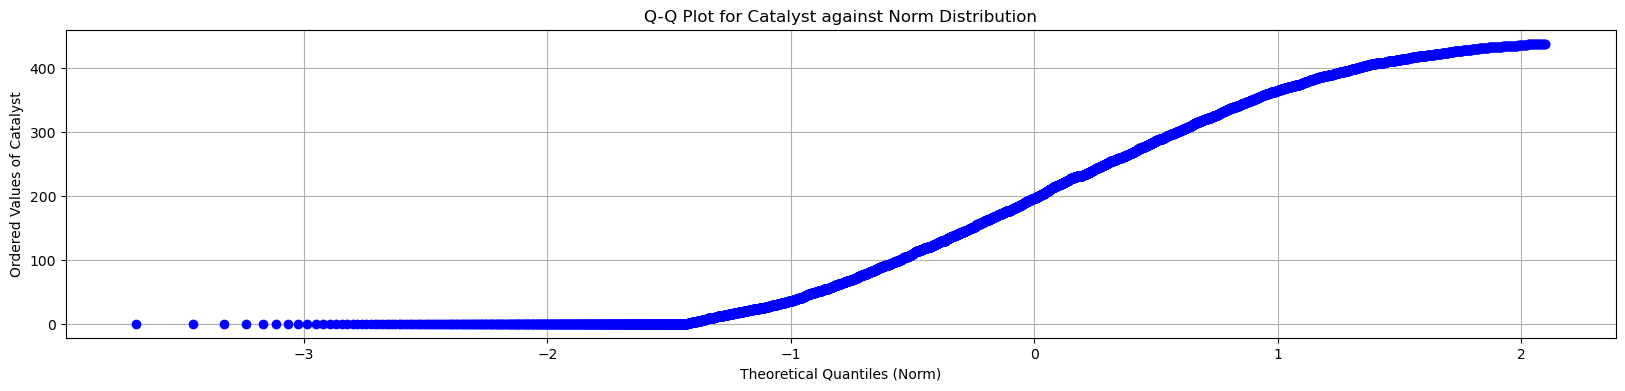

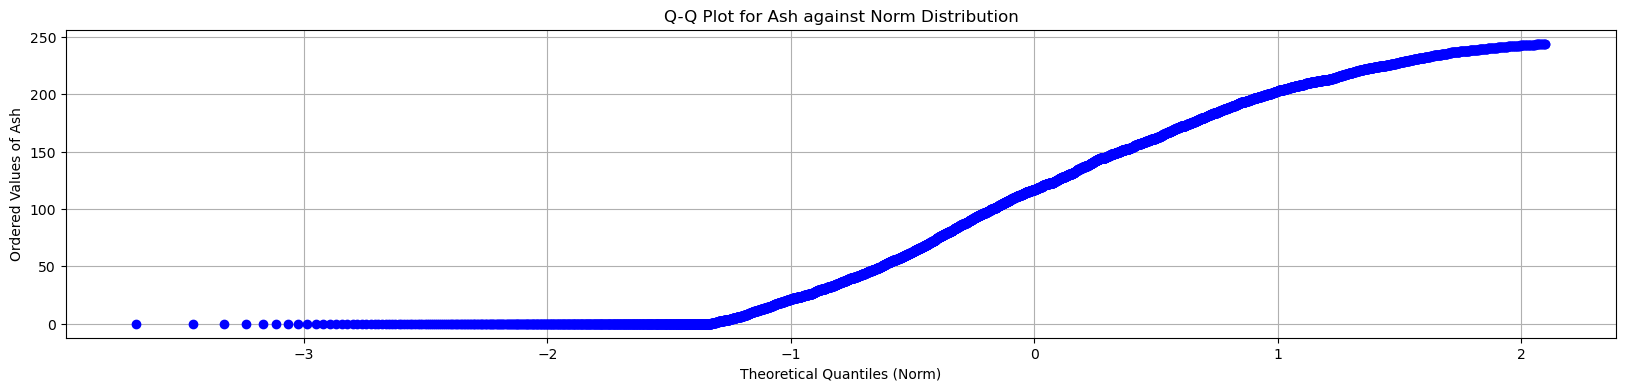

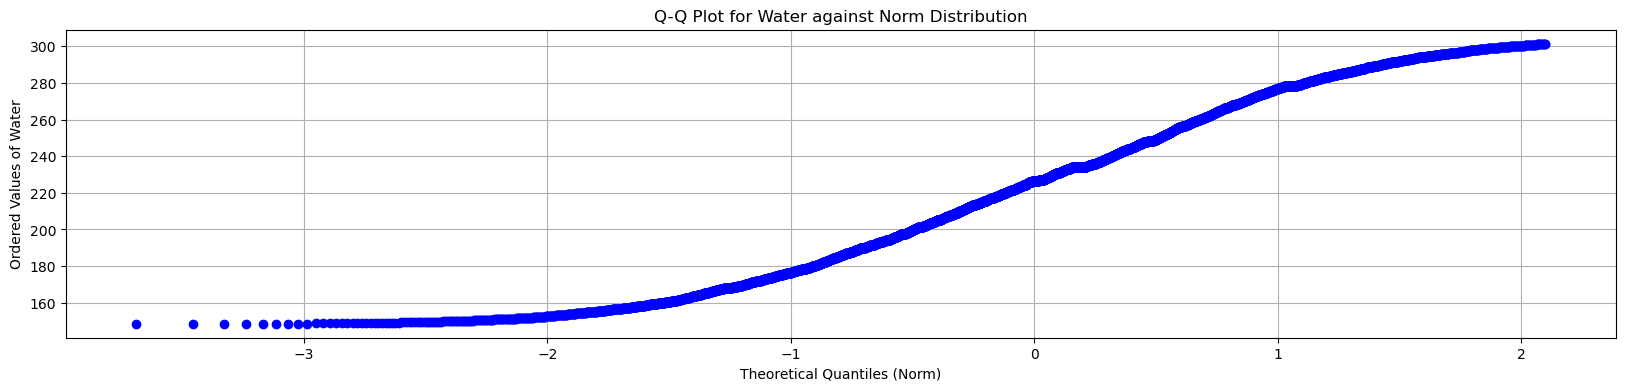

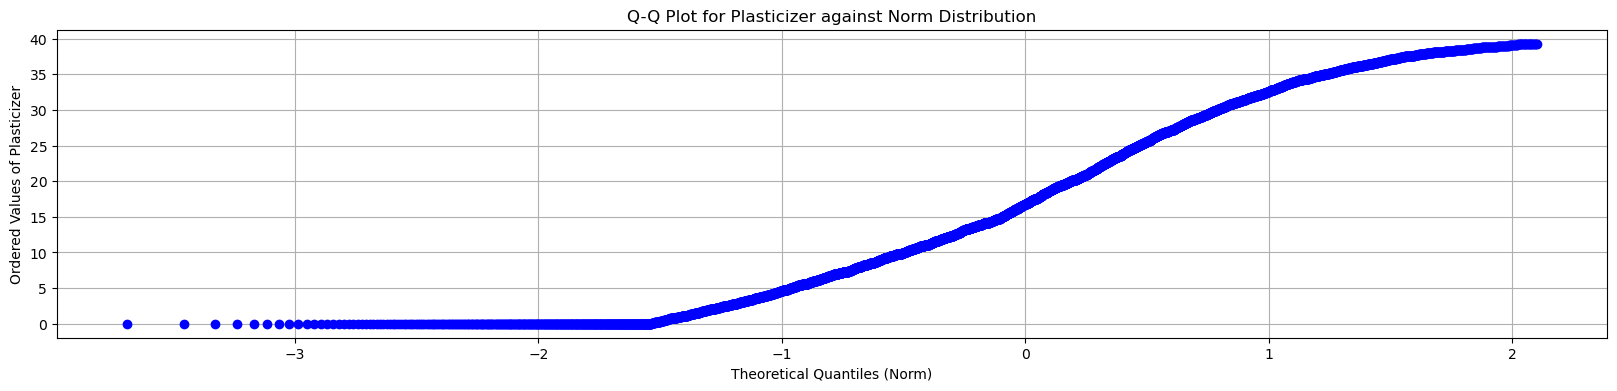

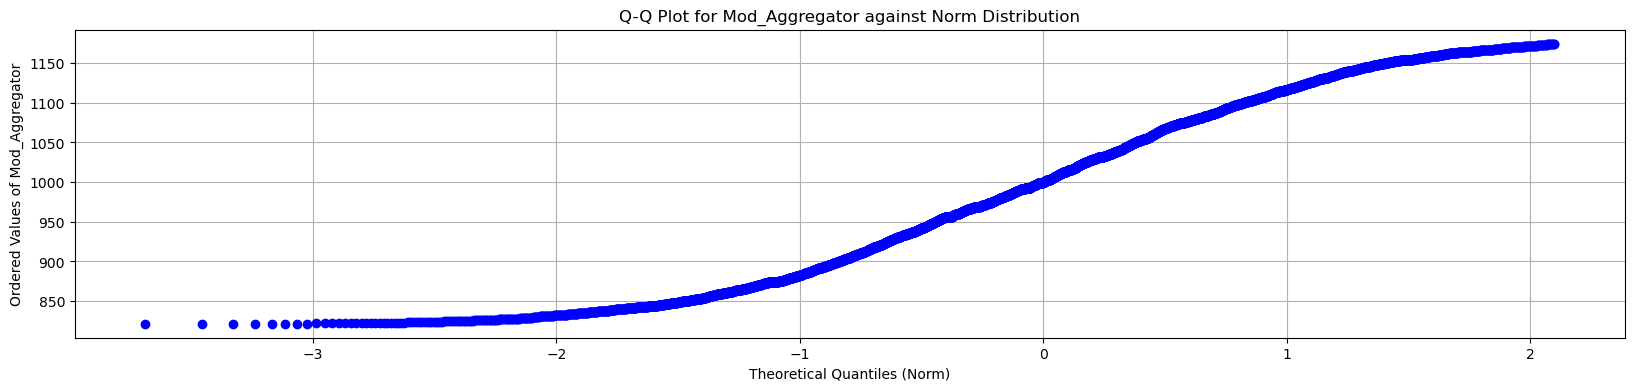

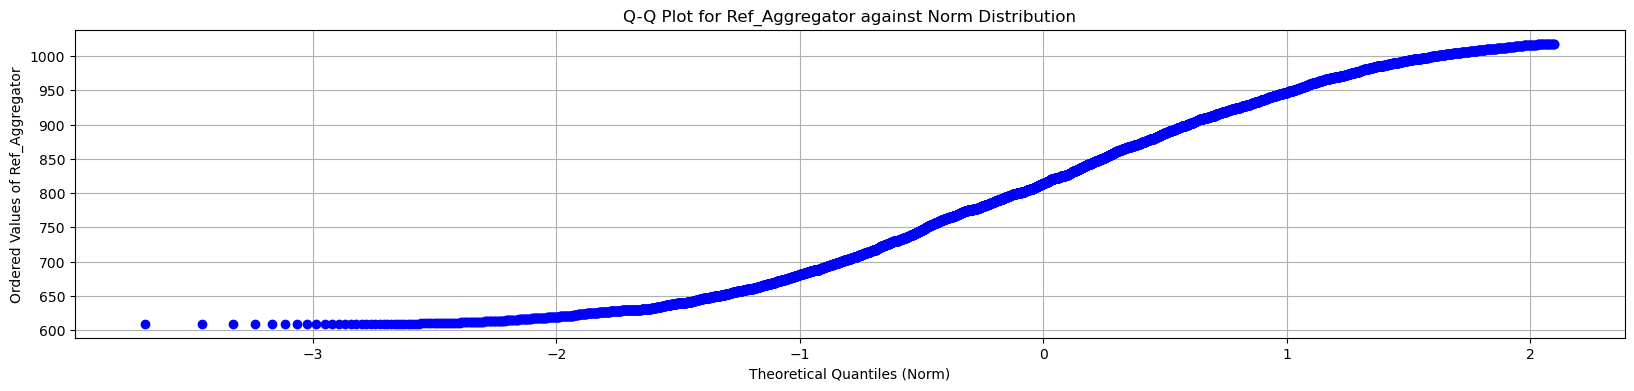

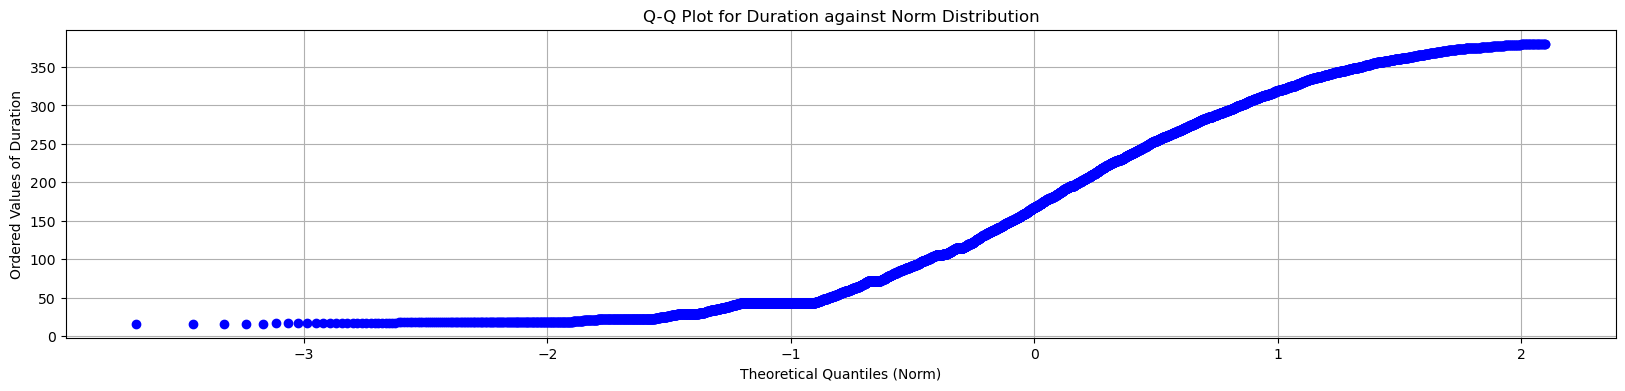

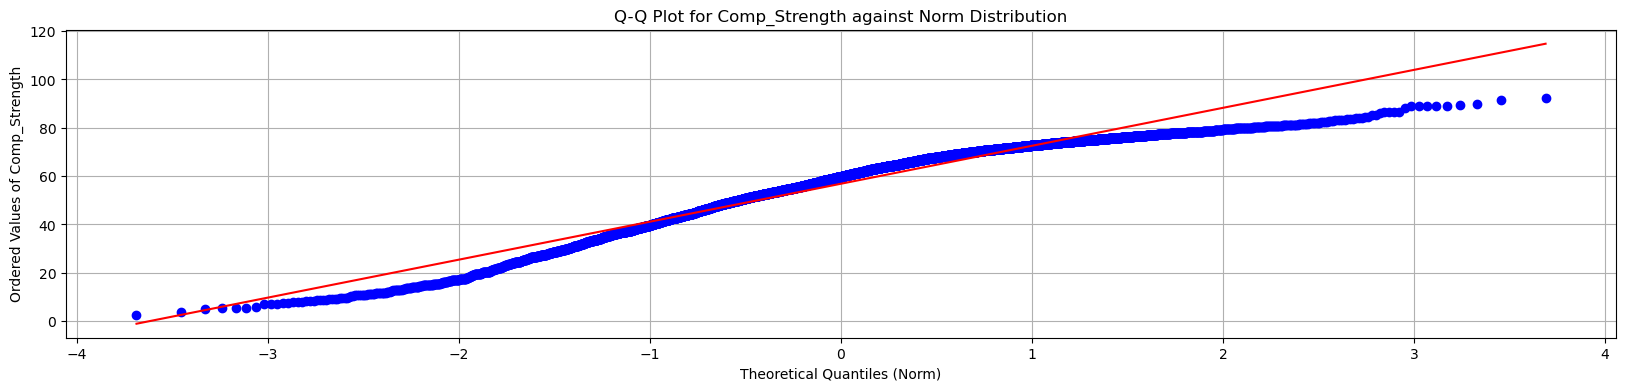

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Assuming df contains your DataFrame with 9 columns

# Selecting 9 columns for Q-Q plots
columns_for_qq = ['Mat_Quantity', 'Catalyst', 'Ash', 'Water','Plasticizer','Mod_Aggregator','Ref_Aggregator','Duration','Comp_Strength']

# Define the reference distribution (e.g., 'norm' for normal distribution)
reference_distribution = 'norm'

# Loop through each column for Q-Q plots
for col in columns_for_qq:
    plt.figure(figsize=(20, 4))
    stats.probplot(df[col], dist=reference_distribution, plot=plt)
    plt.title(f'Q-Q Plot for {col} against {reference_distribution.capitalize()} Distribution')
    plt.xlabel(f'Theoretical Quantiles ({reference_distribution.capitalize()})')
    plt.ylabel(f'Ordered Values of {col}')
    plt.grid(True)
    plt.show()

# **Correlation between variables**

<IPython.core.display.Javascript object>

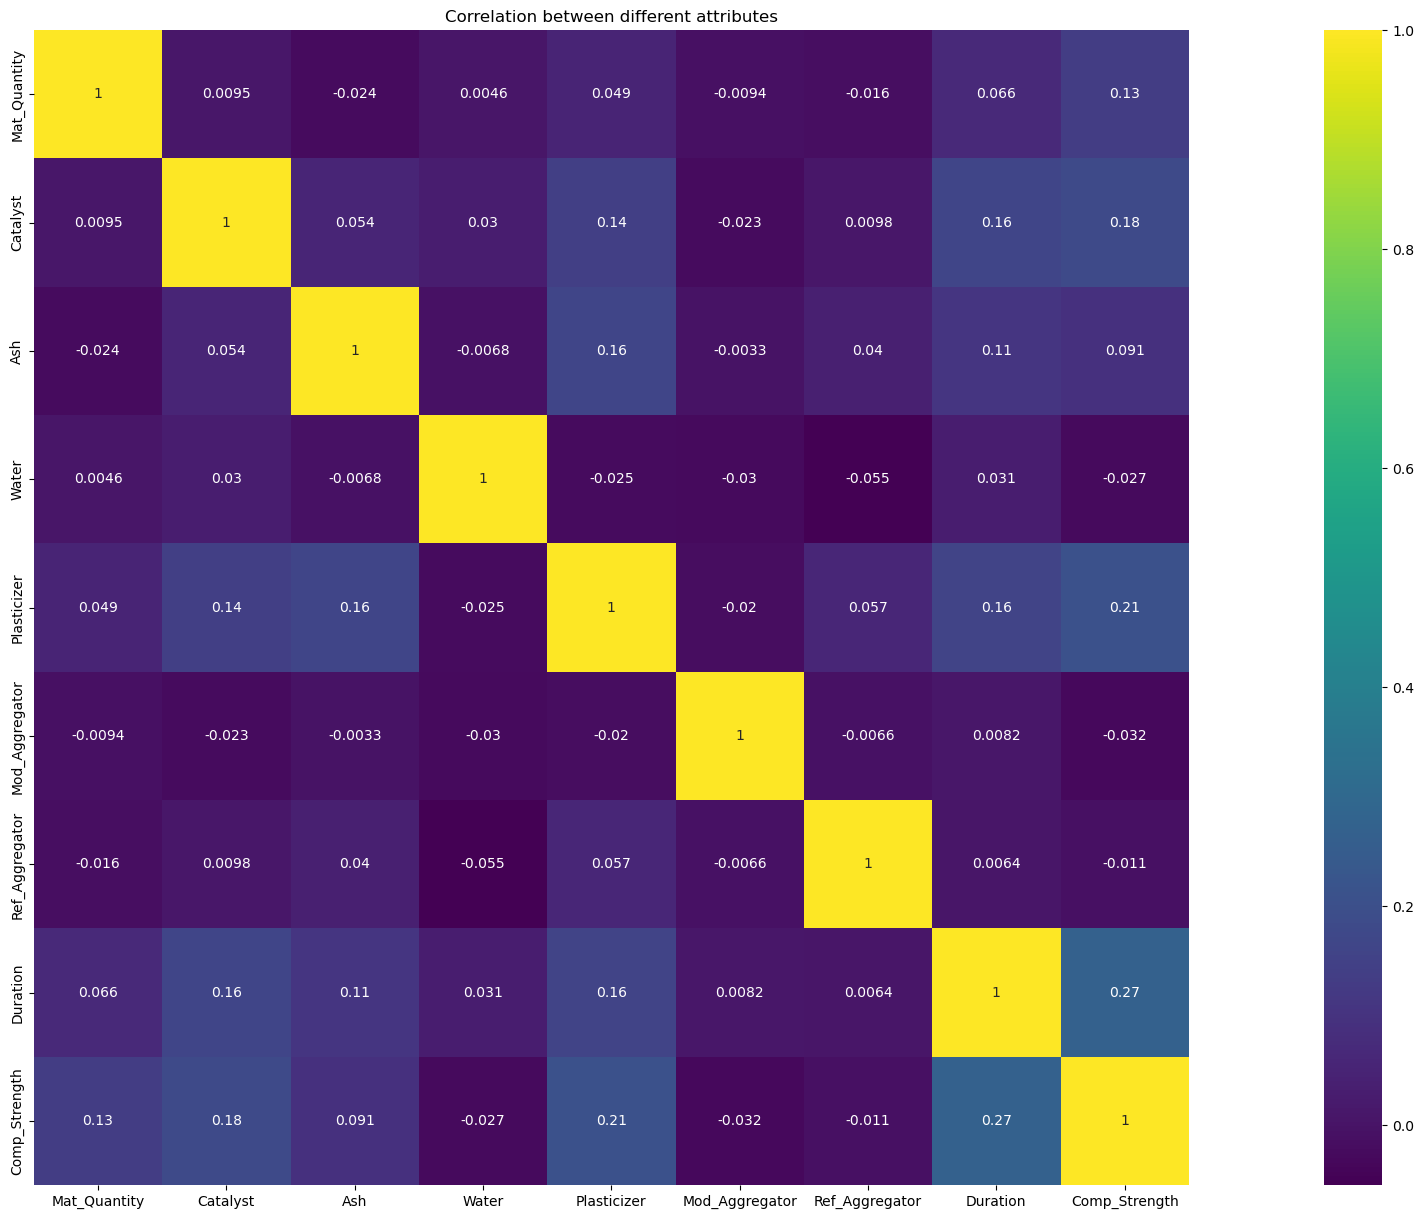

In [ ]:
plt.figure(figsize=(35,15))

sns.heatmap(df.corr(),vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

<Axes: >

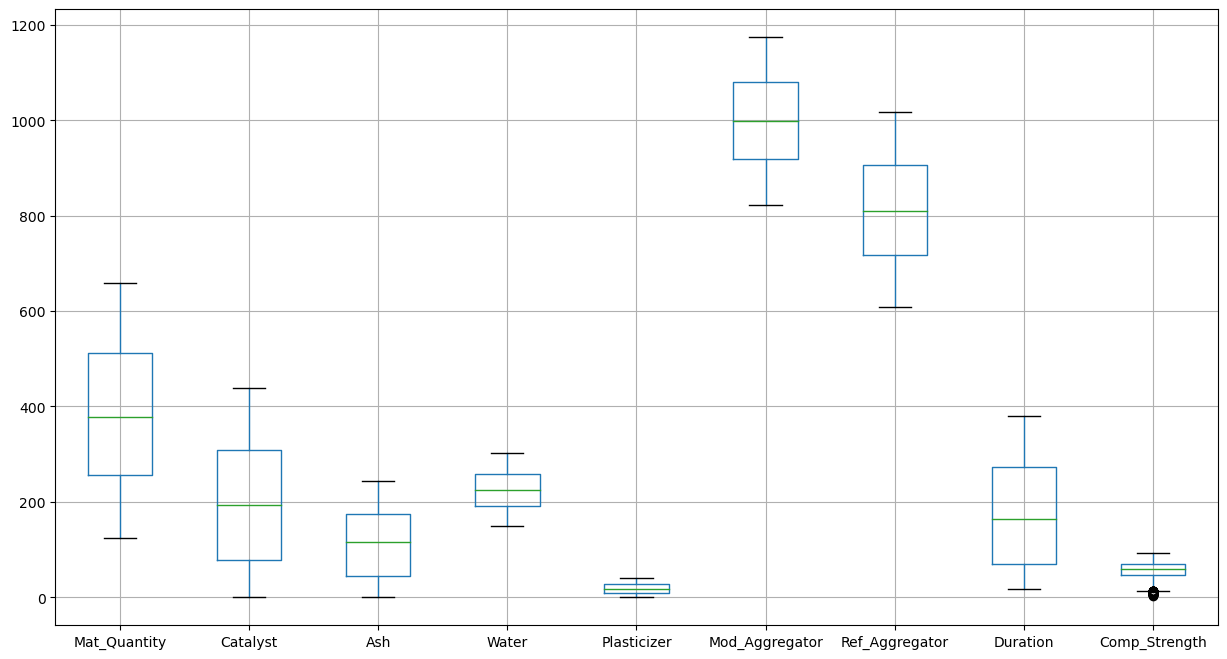

In [ ]:
df.boxplot(figsize=(15,8))

# **Checking for outliers**

In [ ]:
print('Outliers in Mat_Quantity: ', df[((df.Mat_Quantity - df.Mat_Quantity.mean())/df.Mat_Quantity.std()).abs()>3]['Mat_Quantity'].count())
print('Outliers in Catalyst: ', df[((df.Catalyst - df.Catalyst.mean())/df.Catalyst.std()).abs()>3]['Catalyst'].count())
print('Outliers in Ash: ', df[((df.Ash - df.Ash.mean())/df.Ash.std()).abs()>3]['Ash'].count())
print('Outliers in Water: ', df[((df.Water - df.Water.mean())/df.Water.std()).abs()>3]['Water'].count())
print('Outliers in Plasticizer: ', df[((df.Plasticizer - df.Plasticizer.mean())/df.Plasticizer.std()).abs()>3]['Plasticizer'].count())
print('Outliers in Mod_Aggregator: ', df[((df.Mod_Aggregator - df.Mod_Aggregator.mean())/df.Mod_Aggregator.std()).abs()>3]['Mod_Aggregator'].count())
print('Outliers in Ref_Aggregator: ', df[((df.Ref_Aggregator - df.Ref_Aggregator.mean())/df.Ref_Aggregator.std()).abs()>3]['Ref_Aggregator'].count())
print('Outliers in Duration: ', df[((df.Duration - df.Duration.mean())/df.Duration.std()).abs()>3]['Duration'].count())

Outliers in Mat_Quantity:  0
Outliers in Catalyst:  0
Outliers in Ash:  0
Outliers in Water:  0
Outliers in Plasticizer:  0
Outliers in Mod_Aggregator:  0
Outliers in Ref_Aggregator:  0
Outliers in Duration:  0


# **Replacing the outliers by median**

In [ ]:
for cols in df.columns[:-1]:
  Q1 = df[cols].quantile(0.25)
  Q3 = df[cols].quantile(0.75)
  iqr = Q3 - Q1

  low = Q1-1.5*iqr
  high = Q3+1.5*iqr
  df.loc[(df[cols] < low) | (df[cols] > high), cols] = df[cols].median()

<Axes: >

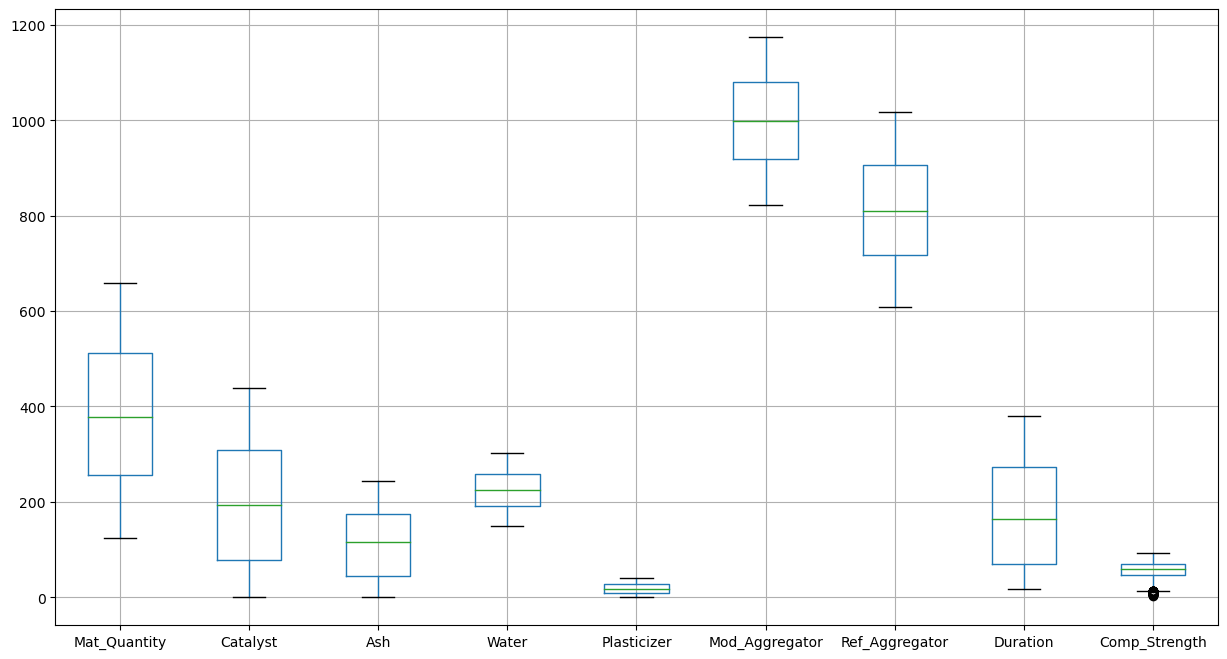

In [ ]:
df.boxplot(figsize=(15,8))

In [ ]:
df.info()  #giving us the information about the datframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6139 entries, 0 to 6138
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mat_Quantity    6030 non-null   float64
 1   Catalyst        6030 non-null   float64
 2   Ash             6030 non-null   float64
 3   Water           6030 non-null   float64
 4   Plasticizer     6030 non-null   float64
 5   Mod_Aggregator  6030 non-null   float64
 6   Ref_Aggregator  6030 non-null   float64
 7   Duration        6030 non-null   float64
 8   Comp_Strength   6139 non-null   float64
dtypes: float64(9)
memory usage: 431.8 KB


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6030 entries, 0 to 6138
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mat_Quantity    6030 non-null   float64
 1   Catalyst        6030 non-null   float64
 2   Ash             6030 non-null   float64
 3   Water           6030 non-null   float64
 4   Plasticizer     6030 non-null   float64
 5   Mod_Aggregator  6030 non-null   float64
 6   Ref_Aggregator  6030 non-null   float64
 7   Duration        6030 non-null   float64
 8   Comp_Strength   6030 non-null   float64
dtypes: float64(9)
memory usage: 471.1 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df contains your DataFrame with the data
scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(df)

In [ ]:
scaled_array

array([[0.67740849, 0.41188679, 0.08708832, ..., 0.2428208 , 0.90159341,
        0.8596218 ],
       [0.01661801, 0.5932903 , 0.76028183, ..., 0.9809207 , 0.03464286,
        0.63615128],
       [0.81504978, 0.00647707, 0.45780764, ..., 0.49278411, 0.60832418,
        0.83704116],
       ...,
       [0.43762632, 0.05177093, 0.07369327, ..., 0.44814344, 0.78711538,
        0.60022247],
       [0.60036305, 0.62852647, 0.73267246, ..., 0.54760041, 0.98456044,
        0.61846496],
       [0.81553634, 0.60793213, 0.68466328, ..., 0.69786214, 0.94700549,
        0.62680756]])

In [ ]:
import pandas as pd

# Convert the scaled array to a DataFrame
scaled_df = pd.DataFrame(scaled_array, columns=df.columns)

In [ ]:
scaled_df

Mat_Quantity  Catalyst       Ash     Water  Plasticizer  Mod_Aggregator  \
0         0.677408  0.411887  0.087088  0.347388     0.410132        0.934272   
1         0.016618  0.593290  0.760282  0.179324     0.159623        0.762513   
2         0.815050  0.006477  0.457808  0.959997     0.304226        0.576470   
3         0.499644  0.800625  0.312920  0.985596     0.483707        0.888102   
4         0.505914  0.804183  0.796125  0.569203     0.433299        0.784253   
...            ...       ...       ...       ...          ...             ...   
6025      0.120406  0.370151  0.584344  0.098599     0.406823        0.516637   
6026      0.421869  0.664698  0.318778  0.259657     0.657332        0.293521   
6027      0.437626  0.051771  0.073693  0.392693     0.888747        0.735588   
6028      0.600363  0.628526  0.732672  0.282637     0.460031        0.123604   
6029      0.815536  0.607932  0.684663  0.176051     0.270621        0.975937   

      Ref_Aggregator  Duration  Comp_Strength  
0           0.242821  0.901593       0.859622  
1           0.980921  0.034643       0.636151  
2           0.492784  0.608324       0.837041  
3           0.665599  0.529011       0.768966  
4           0.420185  0.688434       0.817130  
...              ...       ...            ...  
6025        0.961890  0.938626       0.533927  
6026        0.968837  0.241621       0.574305  
6027        0.448143  0.787115       0.600222  
6028        0.547600  0.984560       0.618465  
6029        0.697862  0.947005       0.626808  

[6030 rows x 9 columns]

In [ ]:
scaled_df.info()
scaled_df.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6030 entries, 0 to 6029
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mat_Quantity    6030 non-null   float64
 1   Catalyst        6030 non-null   float64
 2   Ash             6030 non-null   float64
 3   Water           6030 non-null   float64
 4   Plasticizer     6030 non-null   float64
 5   Mod_Aggregator  6030 non-null   float64
 6   Ref_Aggregator  6030 non-null   float64
 7   Duration        6030 non-null   float64
 8   Comp_Strength   6030 non-null   float64
dtypes: float64(9)
memory usage: 424.1 KB


Mat_Quantity  Catalyst       Ash     Water  Plasticizer  \
Mat_Quantity        1.000000  0.009507 -0.024180  0.004640     0.048551   
Catalyst            0.009507  1.000000  0.053598  0.029818     0.140246   
Ash                -0.024180  0.053598  1.000000 -0.006846     0.161667   
Water               0.004640  0.029818 -0.006846  1.000000    -0.024760   
Plasticizer         0.048551  0.140246  0.161667 -0.024760     1.000000   
Mod_Aggregator     -0.009366 -0.022772 -0.003301 -0.029820    -0.020225   
Ref_Aggregator     -0.016475  0.009807  0.040000 -0.054666     0.056807   
Duration            0.066251  0.162214  0.109820  0.031210     0.156834   
Comp_Strength       0.130875  0.180811  0.090961 -0.027051     0.207256   

                Mod_Aggregator  Ref_Aggregator  Duration  Comp_Strength  
Mat_Quantity         -0.009366       -0.016475  0.066251       0.130875  
Catalyst             -0.022772        0.009807  0.162214       0.180811  
Ash                  -0.003301        0.040000  0.109820       0.090961  
Water                -0.029820       -0.054666  0.031210      -0.027051  
Plasticizer          -0.020225        0.056807  0.156834       0.207256  
Mod_Aggregator        1.000000       -0.006605  0.008240      -0.032151  
Ref_Aggregator       -0.006605        1.000000  0.006408      -0.010762  
Duration              0.008240        0.006408  1.000000       0.268032  
Comp_Strength        -0.032151       -0.010762  0.268032       1.000000

In [ ]:
scaled_df.describe()

Mat_Quantity     Catalyst          Ash        Water  Plasticizer  \
count   6030.000000  6030.000000  6030.000000  6030.000000  6030.000000   
mean       0.485071     0.448605     0.458202     0.495594     0.449366   
std        0.280699     0.304078     0.304117     0.272003     0.297555   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.246257     0.178370     0.182625     0.273586     0.201693   
50%        0.473398     0.438616     0.472104     0.504779     0.416115   
75%        0.724385     0.701644     0.713819     0.712633     0.704366   
max        1.000000     1.000000     1.000000     1.000000     1.000000   

       Mod_Aggregator  Ref_Aggregator     Duration  Comp_Strength  
count     6030.000000     6030.000000  6030.000000    6030.000000  
mean         0.502039        0.495578     0.434501       0.602588  
std          0.277004        0.275949     0.308833       0.179874  
min          0.000000        0.000000     0.000000       0.000000  
25%          0.274637        0.264707     0.148489       0.493354  
50%          0.500099        0.491732     0.403448       0.635095  
75%          0.732066        0.725570     0.704265       0.747469  
max          1.000000        1.000000     1.000000       1.000000

<IPython.core.display.Javascript object>

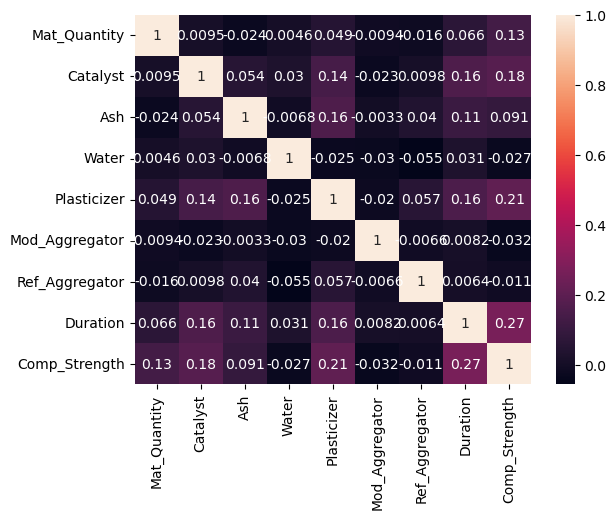

In [ ]:
sns.heatmap(scaled_df.corr(), annot = True)
plt.show()

In [ ]:
scaled_df.shape

(6030, 9)

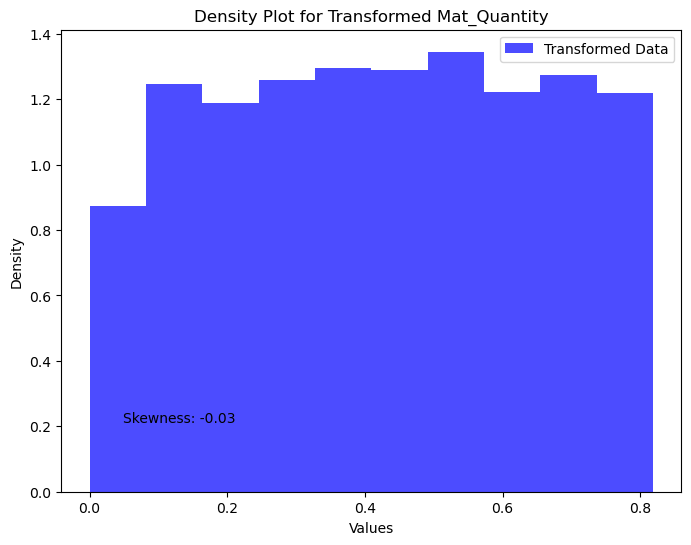

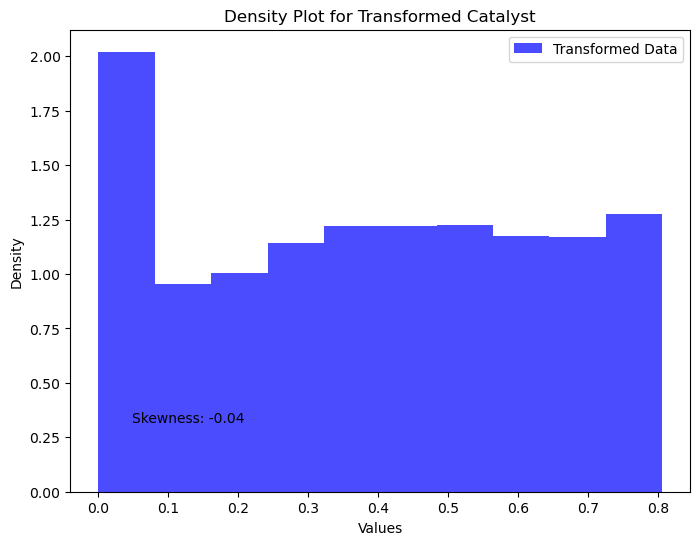

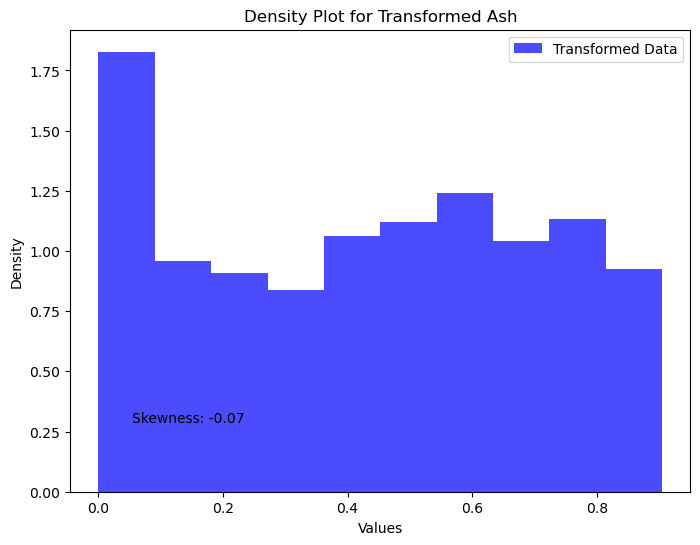

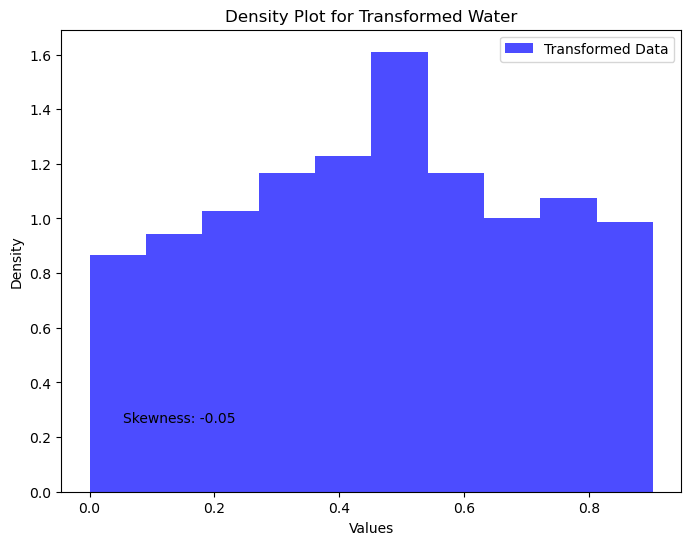

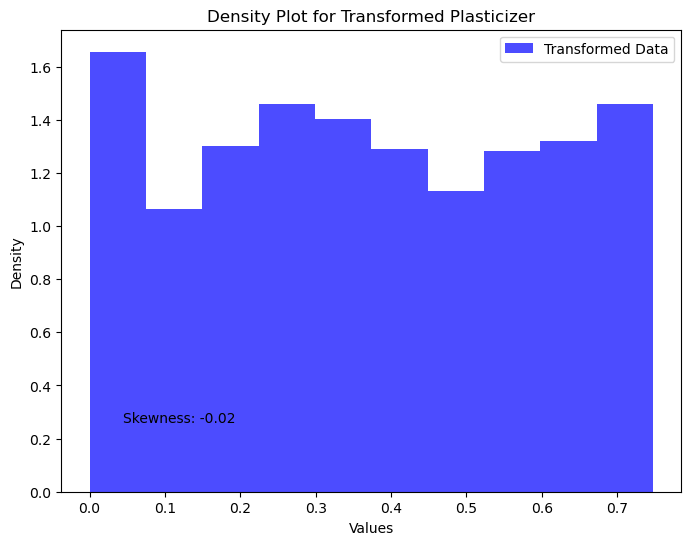

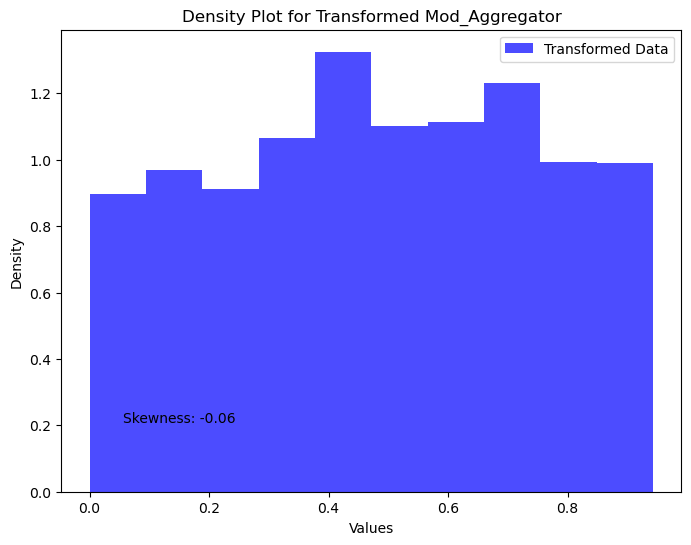

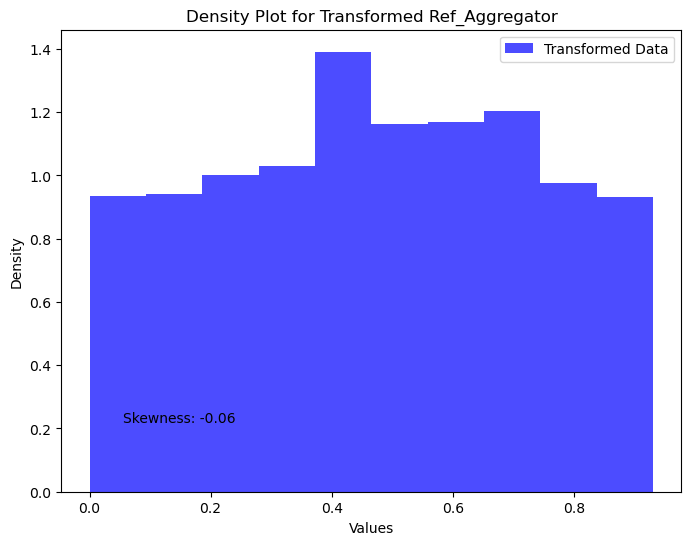

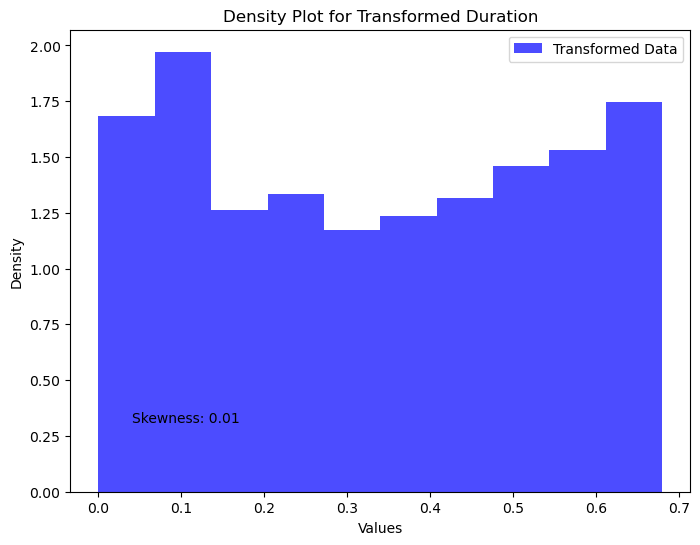

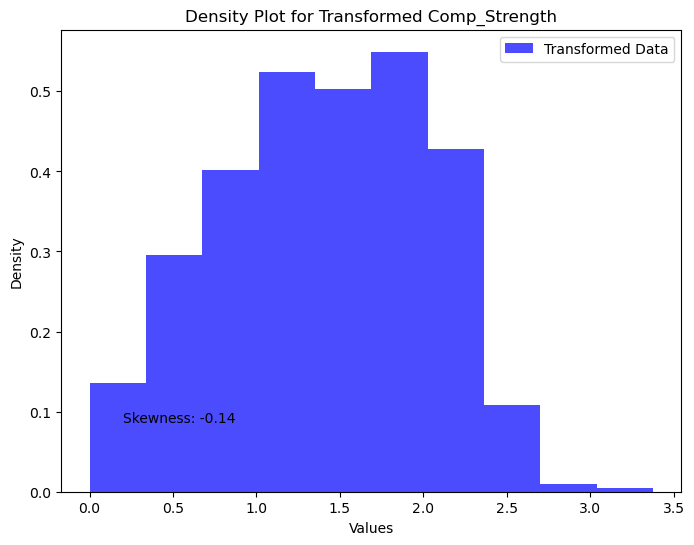

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, boxcox
columns_to_plot = scaled_df.columns

# Loop through columns, apply Box-Cox transformation, and create density plots
for column in columns_to_plot:
    transformed_data, lambda_value = boxcox(scaled_df[column] + 1)  # Adding 1 to handle zero or negative values
    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
    plt.hist(transformed_data, bins=10, density=True, alpha=0.7, color='blue', label='Transformed Data')
    plt.title(f'Density Plot for Transformed {column}')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.legend()
    
    skewness = skew(transformed_data)
    plt.annotate(f"Skewness: {skewness:.2f}", xy=(0, 0), xytext=(0.1, 0.15),
                 xycoords='axes fraction', textcoords='axes fraction')
    
    plt.show()

In [ ]:
transformed_data

array([2.50067527, 1.4388761 , 2.3757408 , ..., 1.30160051, 1.37024006,
       1.40235676])

# **Feature Engineering **

In [ ]:
df.head()

Mat_Quantity  Catalyst     Ash   Water  Plasticizer  Mod_Aggregator  \
0        486.42    180.60   21.26  201.66        16.11         1151.17   
1        133.32    260.14  185.60  175.99         6.27         1090.57   
2        559.97      2.84  111.76  295.23        11.95         1024.93   
3        391.43    351.05   76.39  299.14        19.00         1134.88   
4        394.78    352.61  194.35  235.54        17.02         1098.24   

   Ref_Aggregator  Duration  Comp_Strength  
0          708.50    344.43          79.89  
1         1010.25     28.86          59.80  
2          810.69    237.68          77.86  
3          881.34    208.81          71.74  
4          781.01    266.84          76.07

In [ ]:
#splitting the data into the independent and dependent attributes

#independent and dependent variables
X=df.drop('Comp_Strength',axis=1)
y=df['Comp_Strength']

In [ ]:
from scipy.stats import zscore
Xscaled =X.apply(zscore)
Xscaled_df=pd.DataFrame(Xscaled, columns=df.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

# Building Different Models

## Random Forest

In [ ]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([45.1637, 55.1917, 60.818 , ..., 46.5352, 54.7841, 60.6904])

In [ ]:
#model performance on Training Data
model.score(X_train, y_train)

0.913030013357017

In [ ]:
#model performance on Testing Data
model.score(X_test, y_test)

0.3982835402834429

In [ ]:
acc_R=metrics.r2_score(y_test, y_pred)
acc_R

<IPython.core.display.Javascript object>

0.3982835402834429

In [ ]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

159.88605689639073

In [ ]:
#store the accuracy results for each model in a dataframe for final comparison
results_1 = pd.DataFrame({'Algorithm':['Random Forest'], 'accuracy': acc_R})
results = results_1[['Algorithm','accuracy']]
results

Algorithm  accuracy
0  Random Forest  0.398284

# KFold Cross Cross validation

In [ ]:
k=20
kfold = KFold(n_splits=k, random_state=None)
K_results = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.3953599256348333

In [ ]:
K_results

array([0.4008622 , 0.42607222, 0.40158691, 0.30970517, 0.412771  ,
       0.36146767, 0.33930414, 0.46007371, 0.36172686, 0.38122522,
       0.30457883, 0.33352872, 0.48501113, 0.45449812, 0.40983691,
       0.32525246, 0.47087399, 0.47325841, 0.42117354, 0.37439127])

In [ ]:
#store the accuracy results for each model in a dataframe for final comparison
random_re =pd.DataFrame({'Algorithm':['Random Forest Regressor k_fold'], 'accuracy':accuracy})
results = pd.concat([results, random_re])
results = results[['Algorithm', 'accuracy']]
results

Algorithm  accuracy
0                   Random Forest  0.398284
0  Random Forest Regressor k_fold  0.395360

# Gradient Boosting Regressor

In [ ]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

GradientBoostingRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#model performance on Training Data
model.score(X_train, y_train)

0.45749721417074496

In [ ]:
acc_G=metrics.r2_score(y_test, y_pred)
acc_G

<IPython.core.display.Javascript object>

0.39708924928245837

In [ ]:
model.score(X_test, y_test)

0.39708924928245837

In [ ]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

160.20339985061906

In [ ]:
#store the accuracy results for each model in a dataframe for final comparison
gradient_re =pd.DataFrame({'Algorithm':['Gradient Boost Regressor'], 'accuracy':accuracy})
results = pd.concat([results, gradient_re])
results = results[['Algorithm', 'accuracy']]
results

Algorithm  accuracy
0                   Random Forest  0.398284
0  Random Forest Regressor k_fold  0.395360
0        Gradient Boost Regressor  0.395360

In [ ]:
k=20
kfold = KFold(n_splits=k, random_state=None)
results_3 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results_3))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.38025717172383067

In [ ]:
#store the accuracy results for each model in a dataframe for final comparison
gradient_k =pd.DataFrame({'Algorithm':['Gradient Boost K fold'], 'accuracy':accuracy})
results = pd.concat([results, gradient_k])
results = results[['Algorithm', 'accuracy']]
results

Algorithm  accuracy
0                   Random Forest  0.398284
0  Random Forest Regressor k_fold  0.395360
0        Gradient Boost Regressor  0.395360
0           Gradient Boost K fold  0.380257

# Ada Boosting Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [ ]:
model.fit(X_train, y_train)

AdaBoostRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#model performance on Training Data
model.score(X_train, y_train)

0.20934847655240918

In [ ]:
aa_Ada=metrics.r2_score(y_test, y_pred)
aa_Ada

<IPython.core.display.Javascript object>

0.2151448012613404

In [ ]:
model.score(X_test, y_test)

0.2151448012613404

In [ ]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

208.54906149662108

In [ ]:
#store the accuracy results for each model in a dataframe for final comparison
acc_Ada =pd.DataFrame({'Algorithm':['Ada Boost Regressor'], 'accuracy':accuracy})
results = pd.concat([results, acc_Ada ])
results = results[['Algorithm', 'accuracy']]
results

Algorithm  accuracy
0                   Random Forest  0.398284
0  Random Forest Regressor k_fold  0.395360
0        Gradient Boost Regressor  0.395360
0           Gradient Boost K fold  0.380257
0             Ada Boost Regressor  0.380257

In [ ]:
k=20
kfold = KFold(n_splits=k, random_state=None)
results_4 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results_4))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.23618085765556157

In [ ]:
#store the accuracy results for each model in a dataframe for final comparison
acc_AdaC =pd.DataFrame({'Algorithm':['Ada Boost Regressor K fold'], 'accuracy':accuracy})
results = pd.concat([results, acc_AdaC ])
results = results[['Algorithm', 'accuracy']]
results

Algorithm  accuracy
0                   Random Forest  0.398284
0  Random Forest Regressor k_fold  0.395360
0        Gradient Boost Regressor  0.395360
0           Gradient Boost K fold  0.380257
0             Ada Boost Regressor  0.380257
0      Ada Boost Regressor K fold  0.236181

# KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
#Checking for different values of neighbors to determine K
diff_k=[]
for i in range(1,45):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i= knn.predict(X_test)
    diff_k.append(np.mean(pred_i!=y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Mean errors')

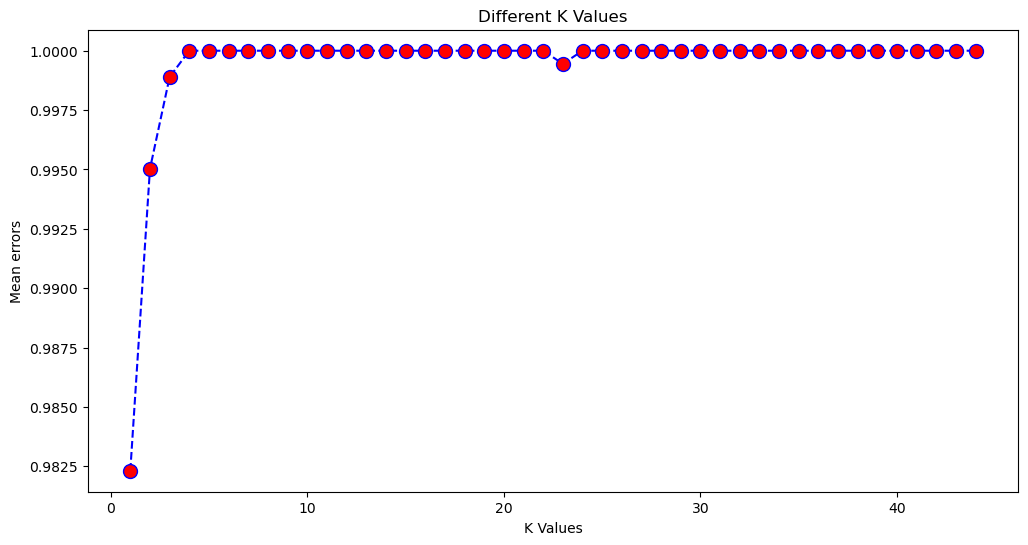

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,45),diff_k,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Different K Values')
plt.xlabel('K Values')
plt.ylabel('Mean errors')

In [ ]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

0.5800337529352984

In [ ]:
acc_KNN=metrics.r2_score(y_test, y_pred)
acc_KNN

<IPython.core.display.Javascript object>

0.1695908542588872

In [ ]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

220.65350179350162

In [ ]:
KNN_df = pd.DataFrame({'Algorithm':['KNN Regressor'], 'accuracy': [acc_KNN]})
results = pd.concat([results, KNN_df])
results = results[['Algorithm','accuracy']]
results

Algorithm  accuracy
0                   Random Forest  0.398284
0  Random Forest Regressor k_fold  0.395360
0        Gradient Boost Regressor  0.395360
0           Gradient Boost K fold  0.380257
0             Ada Boost Regressor  0.380257
0      Ada Boost Regressor K fold  0.236181
0                   KNN Regressor  0.169591

# Kfold Validation

In [ ]:
k = 20

kfold = KFold(n_splits=k, random_state=None)
results_5 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_5))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.148562363391181

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison

KNNfold_df = pd.DataFrame({'Algorithm': ['KNN Regressor k fold'], 'accuracy': accuracy})
results = pd.concat([results, KNNfold_df])
results = results[['Algorithm','accuracy']]
results

Algorithm  accuracy
0                   Random Forest  0.398284
0  Random Forest Regressor k_fold  0.395360
0        Gradient Boost Regressor  0.395360
0           Gradient Boost K fold  0.380257
0             Ada Boost Regressor  0.380257
0      Ada Boost Regressor K fold  0.236181
0                   KNN Regressor  0.169591
0            KNN Regressor k fold  0.148562

# Bagging Reggressor

In [ ]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor()
model.fit(X_train,y_train)

BaggingRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

0.8797987837447423

In [ ]:
model.score(X_test, y_test)

0.3616561122198453

In [ ]:
acc_BR=metrics.r2_score(y_test, y_pred)
acc_BR

<IPython.core.display.Javascript object>

0.3616561122198453

In [ ]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

169.61857285598978

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison

Bagging_df = pd.DataFrame({'Algorithm': ['Bagging Regressor'], 'accuracy': acc_BR})
results = pd.concat([results, Bagging_df])
results = results[['Algorithm','accuracy']]
results

Algorithm  accuracy
0                   Random Forest  0.398284
0  Random Forest Regressor k_fold  0.395360
0        Gradient Boost Regressor  0.395360
0           Gradient Boost K fold  0.380257
0             Ada Boost Regressor  0.380257
0      Ada Boost Regressor K fold  0.236181
0                   KNN Regressor  0.169591
0            KNN Regressor k fold  0.148562
0               Bagging Regressor  0.361656

# KFold Validation

In [ ]:
k = 20

kfold = KFold(n_splits=k, random_state=None)
results_7 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_7))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.33487976949513587

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison

BaggingKFold_df = pd.DataFrame({'Algorithm': ['Bagging Regressor k fold'], 'accuracy': accuracy})
results = pd.concat([results, BaggingKFold_df])
results = results[['Algorithm','accuracy']]
results

Algorithm  accuracy
0                   Random Forest  0.398284
0  Random Forest Regressor k_fold  0.395360
0        Gradient Boost Regressor  0.395360
0           Gradient Boost K fold  0.380257
0             Ada Boost Regressor  0.380257
0      Ada Boost Regressor K fold  0.236181
0                   KNN Regressor  0.169591
0            KNN Regressor k fold  0.148562
0               Bagging Regressor  0.361656
0        Bagging Regressor k fold  0.334880

# Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

0.11205697477049015

In [ ]:
acc_SVR=metrics.r2_score(y_test, y_pred)
acc_SVR

<IPython.core.display.Javascript object>

0.12619646801174544

In [ ]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

232.18411093083972

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison

SVR_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor'], 'accuracy': acc_SVR})
results = pd.concat([results, SVR_df])
results = results[['Algorithm','accuracy']]
results

Algorithm  accuracy
0                   Random Forest  0.398284
0  Random Forest Regressor k_fold  0.395360
0        Gradient Boost Regressor  0.395360
0           Gradient Boost K fold  0.380257
0             Ada Boost Regressor  0.380257
0      Ada Boost Regressor K fold  0.236181
0                   KNN Regressor  0.169591
0            KNN Regressor k fold  0.148562
0               Bagging Regressor  0.361656
0        Bagging Regressor k fold  0.334880
0        Support Vector Regressor  0.126196

# XGBoost Regressor

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr = XGBRegressor()

In [ ]:
xgr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgr.predict(X_test)

In [ ]:
xgr.score(X_train, y_train)

0.9257852375515243

In [ ]:
acc_XGB=metrics.r2_score(y_test, y_pred)
acc_XGB

<IPython.core.display.Javascript object>

0.30332660625016206

In [ ]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

185.11769135210048

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison

XGB_df = pd.DataFrame({'Algorithm': ['XGBoost Regressor'], 'accuracy': [acc_XGB]})
results = pd.concat([results, XGB_df])
results = results[['Algorithm','accuracy']]
results

Algorithm  accuracy
0                   Random Forest  0.398284
0  Random Forest Regressor k_fold  0.395360
0        Gradient Boost Regressor  0.395360
0           Gradient Boost K fold  0.380257
0             Ada Boost Regressor  0.380257
0      Ada Boost Regressor K fold  0.236181
0                   KNN Regressor  0.169591
0            KNN Regressor k fold  0.148562
0               Bagging Regressor  0.361656
0        Bagging Regressor k fold  0.334880
0        Support Vector Regressor  0.126196
0               XGBoost Regressor  0.303327

# DesionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dec_model = DecisionTreeRegressor()
dec_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)

print('Feature importance: \n',pd.DataFrame(dec_model.feature_importances_,columns=['Importance'],index=X_train.columns))

Feature importance: 
                 Importance
Mat_Quantity      0.134763
Catalyst          0.132053
Ash               0.084543
Water             0.079751
Plasticizer       0.144816
Mod_Aggregator    0.078340
Ref_Aggregator    0.086030
Duration          0.259702


As we can see, **Mat_Quantity, Duration**, and **Catalyst and Plasticizer** are most important features

In [ ]:
y_pred = dec_model.predict(X_test)

In [ ]:
dec_model.score(X_train, y_train)

0.9989730485252756

In [ ]:
dec_model.score(X_test, y_test)

-0.23281083924932333

In [ ]:
acc_DT=metrics.r2_score(y_test, y_pred)
acc_DT

<IPython.core.display.Javascript object>

-0.23281083924932333

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison

DT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 1'], 'accuracy': [acc_DT]})
results = pd.concat([results, DT_df])
results = results[['Algorithm','accuracy']]
results

Algorithm  accuracy
0                   Random Forest  0.398284
0  Random Forest Regressor k_fold  0.395360
0        Gradient Boost Regressor  0.395360
0           Gradient Boost K fold  0.380257
0             Ada Boost Regressor  0.380257
0      Ada Boost Regressor K fold  0.236181
0                   KNN Regressor  0.169591
0            KNN Regressor k fold  0.148562
0               Bagging Regressor  0.361656
0        Bagging Regressor k fold  0.334880
0        Support Vector Regressor  0.126196
0               XGBoost Regressor  0.303327
0       Decision Tree Regressor 1 -0.232811

# KFold for Decision Tree Regressor

In [ ]:
k = 20

kfold = KFold(n_splits=k, random_state=None)
results_9 = cross_val_score(dec_model, X, y, cv=kfold)
accuracy=np.mean(abs(results_9))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.20673625960539263

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison

DCT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor k fold'], 'accuracy': accuracy})
results = pd.concat([results, DCT_df])
results = results[['Algorithm','accuracy']]
results

Algorithm  accuracy
0                   Random Forest  0.398284
0  Random Forest Regressor k_fold  0.395360
0        Gradient Boost Regressor  0.395360
0           Gradient Boost K fold  0.380257
0             Ada Boost Regressor  0.380257
0      Ada Boost Regressor K fold  0.236181
0                   KNN Regressor  0.169591
0            KNN Regressor k fold  0.148562
0               Bagging Regressor  0.361656
0        Bagging Regressor k fold  0.334880
0        Support Vector Regressor  0.126196
0               XGBoost Regressor  0.303327
0       Decision Tree Regressor 1 -0.232811
0  Decision Tree Regressor k fold  0.206736

# Feature Selection

In [ ]:
df2 = df.copy() #create a copy of df in order to drop the least important features and work on only the important features

In [ ]:
X = df2.drop(['Comp_Strength','Ash','Mod_Aggregator','Ref_Aggregator'],axis=1)
y = df2['Comp_Strength']
#Split the X and y into training and test set in 70:30 ratio
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3,random_state = 1)

<IPython.core.display.Javascript object>

In [ ]:
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

In [ ]:
decNew_Model = DecisionTreeRegressor()
decNew_Model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(decNew_Model.feature_importances_,columns=['Importance'],index=X_train.columns))

Feature importance: 
               Importance
Mat_Quantity    0.181138
Catalyst        0.182667
Water           0.128706
Plasticizer     0.190448
Duration        0.317041


In [ ]:
y_pred = decNew_Model.predict(X_test)

In [ ]:
decNew_Model.score(X_train, y_train)

0.9986713424581329

In [ ]:
decNew_Model.score(X_test, y_test)

-0.358502636275593

In [ ]:
acc_DT=metrics.r2_score(y_test, y_pred)
acc_DT

<IPython.core.display.Javascript object>

-0.358502636275593

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison

DT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 2'], 'accuracy': [acc_DT]})
results = pd.concat([results, DT_df])
results = results[['Algorithm','accuracy']]
results

Algorithm  accuracy
0                   Random Forest  0.398284
0  Random Forest Regressor k_fold  0.395360
0        Gradient Boost Regressor  0.395360
0           Gradient Boost K fold  0.380257
0             Ada Boost Regressor  0.380257
0      Ada Boost Regressor K fold  0.236181
0                   KNN Regressor  0.169591
0            KNN Regressor k fold  0.148562
0               Bagging Regressor  0.361656
0        Bagging Regressor k fold  0.334880
0        Support Vector Regressor  0.126196
0               XGBoost Regressor  0.303327
0       Decision Tree Regressor 1 -0.232811
0  Decision Tree Regressor k fold  0.206736
0       Decision Tree Regressor 2 -0.358503

In [ ]:
#Let's create our training and testing data again since it has been overriden

X=df.drop('Comp_Strength',axis=1)
y=df['Comp_Strength']

In [ ]:
Xscaled=X.apply(zscore)
Xscaled_df=pd.DataFrame(Xscaled,columns=df.columns)

In [ ]:
#Split the X and y into training and test set in 70:30 ratio
X_train,X_test, y_train,y_test = train_test_split(Xscaled,y, test_size=0.3,random_state = 1)

<IPython.core.display.Javascript object>

In [ ]:
dec_prun_model=DecisionTreeRegressor(max_depth=4, random_state=1,min_samples_leaf=5)
dec_prun_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [ ]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print(pd.DataFrame(dec_prun_model.feature_importances_,columns=['Importance'],index=X_train.columns))

                Importance
Mat_Quantity      0.097087
Catalyst          0.178476
Ash               0.029347
Water             0.017481
Plasticizer       0.164722
Mod_Aggregator    0.000000
Ref_Aggregator    0.017091
Duration          0.495795


In [ ]:
y_pred = dec_prun_model.predict(X_test)

In [ ]:
dec_prun_model.score(X_train,y_train)

0.3387760565647834

In [ ]:
dec_prun_model.score(X_test,y_test)

0.35862957832042386

In [ ]:
acc_DecT=metrics.r2_score(y_test, y_pred)
acc_DecT

<IPython.core.display.Javascript object>

0.35862957832042386

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

<IPython.core.display.Javascript object>

170.422773178962

In [ ]:
DecT_df = pd.DataFrame({'Algorithm': ['Pruned Decision Tree'], 'accuracy': [acc_DecT]})
results = pd.concat([results, DecT_df])
results = results[['Algorithm','accuracy']]
results

Algorithm  accuracy
0                   Random Forest  0.398284
0  Random Forest Regressor k_fold  0.395360
0        Gradient Boost Regressor  0.395360
0           Gradient Boost K fold  0.380257
0             Ada Boost Regressor  0.380257
0      Ada Boost Regressor K fold  0.236181
0                   KNN Regressor  0.169591
0            KNN Regressor k fold  0.148562
0               Bagging Regressor  0.361656
0        Bagging Regressor k fold  0.334880
0        Support Vector Regressor  0.126196
0               XGBoost Regressor  0.303327
0       Decision Tree Regressor 1 -0.232811
0  Decision Tree Regressor k fold  0.206736
0       Decision Tree Regressor 2 -0.358503
0            Pruned Decision Tree  0.358630

In [ ]:
k = 20

kfold = KFold(n_splits=k, random_state=None)
results_10 = cross_val_score(dec_prun_model, X, y, cv=kfold)
accuracy=np.mean(abs(results_10))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.32955310641418223

In [ ]:
DecTKFold_df = pd.DataFrame({'Algorithm': ['Pruned Decision Tree k Fold'], 'accuracy': [accuracy]})
results = pd.concat([results, DecTKFold_df])
results = results[['Algorithm','accuracy']]
results

Algorithm  accuracy
0                   Random Forest  0.398284
0  Random Forest Regressor k_fold  0.395360
0        Gradient Boost Regressor  0.395360
0           Gradient Boost K fold  0.380257
0             Ada Boost Regressor  0.380257
0      Ada Boost Regressor K fold  0.236181
0                   KNN Regressor  0.169591
0            KNN Regressor k fold  0.148562
0               Bagging Regressor  0.361656
0        Bagging Regressor k fold  0.334880
0        Support Vector Regressor  0.126196
0               XGBoost Regressor  0.303327
0       Decision Tree Regressor 1 -0.232811
0  Decision Tree Regressor k fold  0.206736
0       Decision Tree Regressor 2 -0.358503
0            Pruned Decision Tree  0.358630
0     Pruned Decision Tree k Fold  0.329553

# Model Selected

In [ ]:
RFR=RandomForestRegressor()
RFR.fit(X_train, y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor()

In [ ]:
y_pred = RFR.predict(X_test)
y_pred

array([42.8864, 54.2663, 62.2527, ..., 47.1348, 54.2087, 57.3398])

In [ ]:
acc_R=metrics.r2_score(y_test, y_pred)
acc_R

<IPython.core.display.Javascript object>

0.3870484550706391

In [ ]:
RFR.score(X_train, y_train)

0.9129897907244883

In [ ]:
RFR.score(X_test, y_test)

0.3870484550706391

# Prediction Model 

In [ ]:
def pred_strength(Mat_Quantity, Catalyst, Ash, Water,Plasticizer,Mod_Aggregator,Ref_Aggregator,Duration):
    features =np.array([[Mat_Quantity, Catalyst, Ash, Water,Plasticizer,Mod_Aggregator,Ref_Aggregator,Duration]])
    
    pred =RFR.predict(features).reshape(1,-1)
    
    return pred[0]


In [ ]:
Mat_Quantity=350.60
Catalyst=148.90
Ash=80.00
Water=117.10
Plasticizer=25.00
Mod_Aggregator=256.3
Ref_Aggregator=600.70
Duration=30

Strength=pred_strength(Mat_Quantity, Catalyst, Ash, Water,Plasticizer,Mod_Aggregator,Ref_Aggregator,Duration)

<IPython.core.display.Javascript object>

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
print(Strength)

[52.3336]


In [ ]:
import pickle
pickle.dump(RFR,open('model.pkl','wb') )